# Emissions Estimation Data: A Comparison between FAOSTAT and University of Malysia Estimates

In [817]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import contextily as cx
from shapely.geometry import Point, LineString, Polygon
import numpy as np
from scipy.spatial import cKDTree
from geopy.distance import distance
import scipy.stats as stats


### Dependencies 

* Geopandas
* pandas
* openpyxl

## Plan

### Data Imports

* /Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx
* /Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx

### Import Data Frames
Since jupyter caches the data to the notebook json I can import the dataframes that I will be using together.

If I were to build automated scripts to perform the analysis I would only load the data necessary to perform a process. 

### Experiment with Plots for each Set
I don't know exactly which plots I want to include in the final report. 

I 'll plot a few for each data set 

### Calculate differences between the datasets
* create a differences data frame
* write to file for use
* plot



## University of Malaysia Emission Estimates

In [818]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

### Print Df Head

In [819]:
malaysia_emissions_df

iso3_country                                 country_name     tCH4_2015  \
0           BGD                                   Bangladesh  2.344420e+06   
1           BRA                                       Brazil  3.410233e+05   
2           CHN                                        China  6.133647e+06   
3           ESP                                        Spain  1.141464e+04   
4           IDN                                    Indonesia  1.283649e+06   
5           IND                                        India  6.219887e+06   
6           IRN                   Iran (Islamic Republic of)  8.774407e+04   
7           ITA                                        Italy  4.995968e+04   
8           JPN                                        Japan  2.305465e+05   
9           KHM                                     Cambodia  4.954698e+05   
10          KOR                      Korea (the Republic of)  1.451878e+05   
11          LAO       Lao People's Democratic Republic (the)  1.661169e+04   
12          LKA                                    Sri Lanka  8.305626e+04   
13          MMR                                      Myanmar  1.132082e+06   
14          MYS                                     Malaysia  1.057399e+05   
15          NPL                                        Nepal  1.007479e+05   
16          PAK                                     Pakistan  4.852431e+05   
17          PHL                            Philippines (the)  3.432021e+05   
18          PRK  Korea (the Democratic People's Republic of)  1.143217e+05   
19          THA                                     Thailand  1.393798e+06   
20          TWN                   Taiwan (Province of China)  7.866956e+04   
21          USA               United States of America (the)  1.611324e+05   
22          VNM                                     Viet Nam  1.346013e+06   
23          NaN                                        Total  2.270357e+07   

       tCH4_2016     tCH4_2017     tCH4_2018     tCH4_2019     tCH4_2020  \
0   2.278158e+06  2.098958e+06  2.141231e+06  2.070985e+06  2.106781e+06   
1   3.104189e+05  3.725173e+05  3.717030e+05  3.294713e+05  4.902874e+05   
2   5.859531e+06  6.355071e+06  5.413962e+06  5.603352e+06  6.402353e+06   
3   1.334803e+04  1.217299e+04  1.405410e+04  1.148324e+04  1.305461e+04   
4   1.023129e+06  9.615327e+05  1.176982e+06  1.266668e+06  1.188195e+06   
5   5.309413e+06  6.228451e+06  6.589798e+06  7.501556e+06  7.599764e+06   
6   9.180121e+04  9.620217e+04  8.875744e+04  9.500199e+04  9.600254e+04   
7   4.937785e+04  5.443679e+04  4.469902e+04  4.566914e+04  5.101547e+04   
8   2.284133e+05  2.708935e+05  1.548252e+05  2.332056e+05  2.835167e+05   
9   5.731698e+05  4.517045e+05  5.592610e+05  5.947277e+05  6.412802e+05   
10  1.274597e+05  1.463222e+05  1.293543e+05  1.327782e+05  1.165467e+05   
11  1.696441e+04  1.168063e+04  1.009675e+04  1.461058e+04  2.136270e+04   
12  1.011743e+05  5.911841e+04  9.018914e+04  8.476088e+04  9.248238e+04   
13  1.290806e+06  1.205169e+06  1.372447e+06  1.256888e+06  1.221904e+06   
14  1.110049e+05  1.111291e+05  1.066525e+05  1.056287e+05  1.127141e+05   
15  6.667161e+04  8.081300e+04  9.200752e+04  1.164235e+05  7.168401e+04   
16  5.945922e+05  5.372641e+05  4.532297e+05  6.528548e+05  6.401201e+05   
17  4.073554e+05  3.836830e+05  4.175210e+05  3.584550e+05  4.462836e+05   
18  9.177653e+04  1.085457e+05  8.662578e+04  9.655062e+04  8.581038e+04   
19  1.780993e+06  1.164699e+06  9.166575e+05  1.305046e+06  1.520788e+06   
20  8.089149e+04  8.705634e+04  8.138151e+04  8.990870e+04  8.333327e+04   
21  1.618576e+05  1.684799e+05  1.657254e+05  1.691351e+05  1.941455e+05   
22  1.483777e+06  1.406437e+06  1.317455e+06  1.269751e+06  1.374450e+06   
23  2.205208e+07  2.237234e+07  2.179462e+07  2.340491e+07  2.485387e+07   

       tCH4_2021  
0   1.983974e+06  
1   4.544874e+05  
2   6.068210e+06  
3   8.531579e+03  
4   1.009936e+06  
5   6.567960e+06  
6   9.053525e+04  

### Calculate Co2 Equivalency

In [820]:
malaysia_emissions_df['tCO2_2015'] = (malaysia_emissions_df['tCH4_2015'] * 25)
malaysia_emissions_df['tCO2_2016'] = (malaysia_emissions_df['tCH4_2016'] * 25)
malaysia_emissions_df['tCO2_2017'] = (malaysia_emissions_df['tCH4_2017'] * 25)
malaysia_emissions_df['tCO2_2018'] = (malaysia_emissions_df['tCH4_2018'] * 25)
malaysia_emissions_df['tCO2_2019'] = (malaysia_emissions_df['tCH4_2019'] * 25)

### Calculate Means 

In [821]:
malaysia_emissions_df.loc['mean'] = malaysia_emissions_df.loc[(malaysia_emissions_df['country_name'] != "Total")].select_dtypes(np.number).mean()
malaysia_emissions_df.at['mean','country_name'] = 'mean'
malaysia_emissions_df

iso3_country                                 country_name     tCH4_2015  \
0             BGD                                   Bangladesh  2.344420e+06   
1             BRA                                       Brazil  3.410233e+05   
2             CHN                                        China  6.133647e+06   
3             ESP                                        Spain  1.141464e+04   
4             IDN                                    Indonesia  1.283649e+06   
5             IND                                        India  6.219887e+06   
6             IRN                   Iran (Islamic Republic of)  8.774407e+04   
7             ITA                                        Italy  4.995968e+04   
8             JPN                                        Japan  2.305465e+05   
9             KHM                                     Cambodia  4.954698e+05   
10            KOR                      Korea (the Republic of)  1.451878e+05   
11            LAO       Lao People's Democratic Republic (the)  1.661169e+04   
12            LKA                                    Sri Lanka  8.305626e+04   
13            MMR                                      Myanmar  1.132082e+06   
14            MYS                                     Malaysia  1.057399e+05   
15            NPL                                        Nepal  1.007479e+05   
16            PAK                                     Pakistan  4.852431e+05   
17            PHL                            Philippines (the)  3.432021e+05   
18            PRK  Korea (the Democratic People's Republic of)  1.143217e+05   
19            THA                                     Thailand  1.393798e+06   
20            TWN                   Taiwan (Province of China)  7.866956e+04   
21            USA               United States of America (the)  1.611324e+05   
22            VNM                                     Viet Nam  1.346013e+06   
23            NaN                                        Total  2.270357e+07   
mean          NaN                                         mean  9.871116e+05   

         tCH4_2016     tCH4_2017     tCH4_2018     tCH4_2019     tCH4_2020  \
0     2.278158e+06  2.098958e+06  2.141231e+06  2.070985e+06  2.106781e+06   
1     3.104189e+05  3.725173e+05  3.717030e+05  3.294713e+05  4.902874e+05   
2     5.859531e+06  6.355071e+06  5.413962e+06  5.603352e+06  6.402353e+06   
3     1.334803e+04  1.217299e+04  1.405410e+04  1.148324e+04  1.305461e+04   
4     1.023129e+06  9.615327e+05  1.176982e+06  1.266668e+06  1.188195e+06   
5     5.309413e+06  6.228451e+06  6.589798e+06  7.501556e+06  7.599764e+06   
6     9.180121e+04  9.620217e+04  8.875744e+04  9.500199e+04  9.600254e+04   
7     4.937785e+04  5.443679e+04  4.469902e+04  4.566914e+04  5.101547e+04   
8     2.284133e+05  2.708935e+05  1.548252e+05  2.332056e+05  2.835167e+05   
9     5.731698e+05  4.517045e+05  5.592610e+05  5.947277e+05  6.412802e+05   
10    1.274597e+05  1.463222e+05  1.293543e+05  1.327782e+05  1.165467e+05   
11    1.696441e+04  1.168063e+04  1.009675e+04  1.461058e+04  2.136270e+04   
12    1.011743e+05  5.911841e+04  9.018914e+04  8.476088e+04  9.248238e+04   
13    1.290806e+06  1.205169e+06  1.372447e+06  1.256888e+06  1.221904e+06   
14    1.110049e+05  1.111291e+05  1.066525e+05  1.056287e+05  1.127141e+05   
15    6.667161e+04  8.081300e+04  9.200752e+04  1.164235e+05  7.168401e+04   
16    5.945922e+05  5.372641e+05  4.532297e+05  6.528548e+05  6.401201e+05   
17    4.073554e+05  3.836830e+05  4.175210e+05  3.584550e+05  4.462836e+05   
18    9.177653e+04  1.085457e+05  8.662578e+04  9.655062e+04  8.581038e+04   
19    1.780993e+06  1.164699e+06  9.166575e+05  1.305046e+06  1.520788e+06   
20    8.089149e+04  8.705634e+04  8.138151e+04  8.990870e+04  8.333327e+04   
21    1.618576e+05  1.684799e+05  1.657254e+05  1.691351e+05  1.941455e+05   
22    1.483777e+06  1.406437e+06  1.317455e+06  1.269751e+06  1.374450e+06   
23    2.205208e+07  2.237234e+07  2.179462e+07  2.34

# Calculate Means and Totals Across Rows

In [822]:
mean_series = malaysia_emissions_df[['tCH4_2015','tCH4_2016','tCH4_2017','tCH4_2018','tCH4_2019']].select_dtypes(np.number).mean(axis=1)
total_series = malaysia_emissions_df[['tCH4_2015','tCH4_2016','tCH4_2017','tCH4_2018','tCH4_2019']].select_dtypes(np.number).sum(axis=1)
malaysia_emissions_df["Mean_CH4"] = mean_series
malaysia_emissions_df['Total_CH4'] = total_series 

In [823]:
## the select np.number is uncecessary, but i'm including anyways as it doesnt really hurt but for a small calculation penalty
mean_series = malaysia_emissions_df[['tCO2_2015','tCO2_2016','tCO2_2017','tCO2_2018','tCO2_2019']].select_dtypes(np.number).mean(axis=1)
total_series = malaysia_emissions_df[['tCO2_2015','tCO2_2016','tCO2_2017','tCO2_2018','tCO2_2019']].select_dtypes(np.number).sum(axis=1)
malaysia_emissions_df["Mean_CO2"] = mean_series
malaysia_emissions_df['Total_CO2'] = total_series 

In [824]:
malaysia_emissions_df.reset_index(inplace=True, drop = True)

In [825]:
malaysia_emissions_df

iso3_country                                 country_name     tCH4_2015  \
0           BGD                                   Bangladesh  2.344420e+06   
1           BRA                                       Brazil  3.410233e+05   
2           CHN                                        China  6.133647e+06   
3           ESP                                        Spain  1.141464e+04   
4           IDN                                    Indonesia  1.283649e+06   
5           IND                                        India  6.219887e+06   
6           IRN                   Iran (Islamic Republic of)  8.774407e+04   
7           ITA                                        Italy  4.995968e+04   
8           JPN                                        Japan  2.305465e+05   
9           KHM                                     Cambodia  4.954698e+05   
10          KOR                      Korea (the Republic of)  1.451878e+05   
11          LAO       Lao People's Democratic Republic (the)  1.661169e+04   
12          LKA                                    Sri Lanka  8.305626e+04   
13          MMR                                      Myanmar  1.132082e+06   
14          MYS                                     Malaysia  1.057399e+05   
15          NPL                                        Nepal  1.007479e+05   
16          PAK                                     Pakistan  4.852431e+05   
17          PHL                            Philippines (the)  3.432021e+05   
18          PRK  Korea (the Democratic People's Republic of)  1.143217e+05   
19          THA                                     Thailand  1.393798e+06   
20          TWN                   Taiwan (Province of China)  7.866956e+04   
21          USA               United States of America (the)  1.611324e+05   
22          VNM                                     Viet Nam  1.346013e+06   
23          NaN                                        Total  2.270357e+07   
24          NaN                                         mean  9.871116e+05   

       tCH4_2016     tCH4_2017     tCH4_2018     tCH4_2019     tCH4_2020  \
0   2.278158e+06  2.098958e+06  2.141231e+06  2.070985e+06  2.106781e+06   
1   3.104189e+05  3.725173e+05  3.717030e+05  3.294713e+05  4.902874e+05   
2   5.859531e+06  6.355071e+06  5.413962e+06  5.603352e+06  6.402353e+06   
3   1.334803e+04  1.217299e+04  1.405410e+04  1.148324e+04  1.305461e+04   
4   1.023129e+06  9.615327e+05  1.176982e+06  1.266668e+06  1.188195e+06   
5   5.309413e+06  6.228451e+06  6.589798e+06  7.501556e+06  7.599764e+06   
6   9.180121e+04  9.620217e+04  8.875744e+04  9.500199e+04  9.600254e+04   
7   4.937785e+04  5.443679e+04  4.469902e+04  4.566914e+04  5.101547e+04   
8   2.284133e+05  2.708935e+05  1.548252e+05  2.332056e+05  2.835167e+05   
9   5.731698e+05  4.517045e+05  5.592610e+05  5.947277e+05  6.412802e+05   
10  1.274597e+05  1.463222e+05  1.293543e+05  1.327782e+05  1.165467e+05   
11  1.696441e+04  1.168063e+04  1.009675e+04  1.461058e+04  2.136270e+04   
12  1.011743e+05  5.911841e+04  9.018914e+04  8.476088e+04  9.248238e+04   
13  1.290806e+06  1.205169e+06  1.372447e+06  1.256888e+06  1.221904e+06   
14  1.110049e+05  1.111291e+05  1.066525e+05  1.056287e+05  1.127141e+05   
15  6.667161e+04  8.081300e+04  9.200752e+04  1.164235e+05  7.168401e+04   
16  5.945922e+05  5.372641e+05  4.532297e+05  6.528548e+05  6.401201e+05   
17  4.073554e+05  3.836830e+05  4.175210e+05  3.584550e+05  4.462836e+05   
18  9.177653e+04  1.085457e+05  8.662578e+04  9.655062e+04  8.581038e+04   
19  1.780993e+06  1.164699e+06  9.166575e+05  1.305046e+06  1.520788e+06   
20  8.089149e+04  8.705634e+04  8.138151e+04  8.990870e+04  8.333327e+04   
21  1.618576e+05  1.684799e+05  1.657254e+05  1.691351e+05  1.941455e+05   
22  1.483777e+06  1.406437e+06  1.317455e+06  1.269751e+06  1.374450e+06   
23  2.205208e+07  2.237234e+07  2.179462e+07  2.340491e+07  2.485387e+07   
24  9.587863e+05  9.727103e+05  9.475920e+05  1.017605e+06  1.080603e+06  

### Write Data to File

In [826]:
outfile = "/Users/jnapolitano/Projects/wattime-takehome/data/TRACE_DATA.csv"

malaysia_emissions_df.to_csv(outfile)

### Plots

#### University of Malaysia Bar Plot

<AxesSubplot:ylabel='Country Name'>

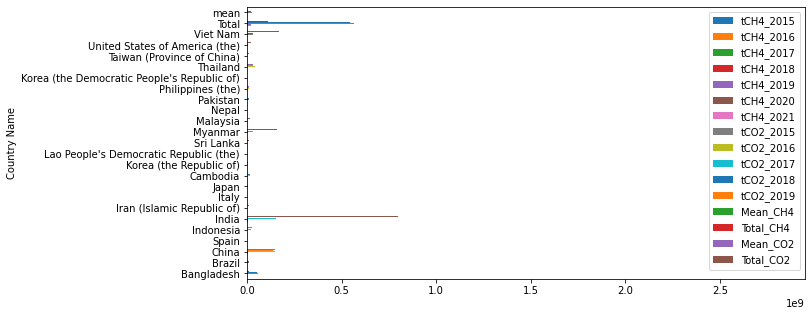

In [827]:
malaysia_emissions_df.plot(kind = "barh", x = 'country_name', xlabel = "Country Name", ylabel = "CH4 Tonnes", figsize = (10,5))

#### University of Malaysia Density Plot

<AxesSubplot:ylabel='Density'>

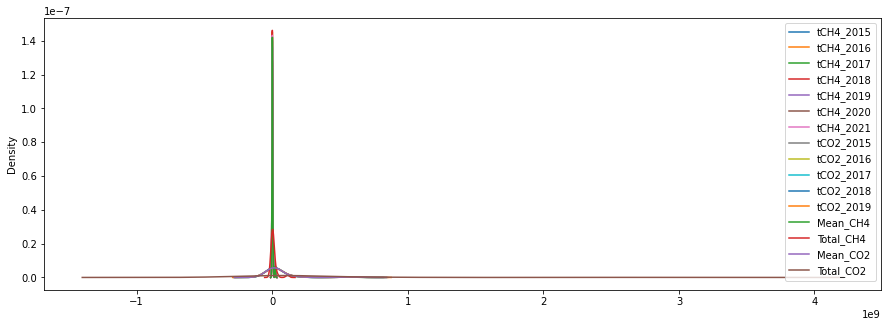

In [828]:
malaysia_emissions_df.plot(rot = 0, kind = "density", figsize = (15,5)) 

I did not exclude totals or mean from the dataframe, but as we can see the second hump in the density graph shows the distribution of totals annualy.  Interestingly the 2020 data is shifted further to the right than other years.  This actually questions the validity of the study promoted by the University of malaysia

## FAOSTAT Data 

In [829]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

### Print FAOSTAT Data

In [830]:
## I didn't write the index to the csv file in the previous step.  IF time permits go back and fix this error
faostat_emissions_df


code                                      country  \
0   BGD                                   Bangladesh   
1   BRA                                       Brazil   
2   CHN                                        China   
3   ESP                                        Spain   
4   IDN                                    Indonesia   
5   IND                                        India   
6   IRN                   Iran (Islamic Republic of)   
7   ITA                                        Italy   
8   JPN                                        Japan   
9   KHM                                     Cambodia   
10  KOR                      Korea (the Republic of)   
11  LAO       Lao People's Democratic Republic (the)   
12  LKA                                    Sri Lanka   
13  MMR                                      Myanmar   
14  MYS                                     Malaysia   
15  NPL                                        Nepal   
16  PAK                                     Pakistan   
17  PHL                            Philippines (the)   
18  PRK  Korea (the Democratic People's Republic of)   
19  THA                                     Thailand   
20  TWN                   Taiwan (Province of China)   
21  USA               United States of America (the)   
22  VNM                                     Viet Nam   
23  NaN                                          NaN   

                              country_fao        2015        2016        2017  \
0                              Bangladesh   1131293.4   1093480.4   1154531.0   
1                                  Brazil    138910.3    126278.2    130322.9   
2                         China, mainland   5406593.9   5399920.0   5400129.0   
3                                   Spain     55082.2     55073.1     54232.4   
4                               Indonesia   2407953.5   2387656.4   2425290.6   
5                                   India   4580248.4   4559136.4   4620790.8   
6              Iran (Islamic Republic of)    116486.7    131008.5     87233.6   
7                                   Italy    114574.8    118003.0    118003.0   
8                                   Japan    330353.1    326403.0    323700.3   
9                                Cambodia    436826.0    459003.1    473745.3   
10                      Republic of Korea    167862.2    163534.1    158489.7   
11       Lao People's Democratic Republic     94826.8     95630.0     93940.7   
12                              Sri Lanka    132640.0    121756.3     84456.3   
13                                Myanmar   1059409.6   1052287.7   1087029.5   
14                               Malaysia    121942.6    123232.8    122656.3   
15                                  Nepal    149262.2    142723.7    162574.6   
16                               Pakistan    383529.3    381361.8    406083.3   
17                            Philippines   1557810.6   1524292.5   1609862.5   
18  Democratic People's Republic of Korea     82823.3     83442.3     84596.2   
19                               Thailand   1554254.0   1703327.7   1714465.6   
20              China, Taiwan Province of     45838.7     49838.3     49991.2   
21               United States of America    364728.0    438662.0    336255.5   
22                               Viet Nam   1381744.4   1365173.8   1360551.6   
23                                  Total  23829994.0  23917225.1  24075931.9   

          2018        2019  2020  2021  
0    1144591.0   1144745.4   NaN   NaN  
1     121615.2    111084.8   NaN   NaN  
2    5302173.1   5214454.7   NaN   NaN  
3      52925.0     52098.5   NaN   NaN  
4    2405613.8   2257604.3   NaN   NaN  
5    4661154.9   4621416.8   NaN   NaN  
6      93936.6     96103.4   NaN   NaN  
7     109463.8    110895.1   NaN   NaN  
8     322245.0    320581.8   NaN   NaN  
9     479362.7    468378.9   NaN   NaN  
10    154911.3    153260.9   NaN   NaN  
11     83333.6     77005.5   NaN   NaN  
12    111049.0    102156.3   NaN   NaN  
13

#### Change code to iso3_country

In [831]:

faostat_emissions_df.rename(columns={"code": "iso3_country"}, inplace =True)
faostat_emissions_df.rename(columns={"country": "country_name"}, inplace =True)
# The column title is not a string.  It is understood as an int or a datetime.  
#faostat_emissions_df['2015']
faostat_emissions_df

iso3_country                                 country_name  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2015        2016        2017  \
0                              Bangladesh   1131293.4   1093480.4   1154531.0   
1                                  Brazil    138910.3    126278.2    130322.9   
2                         China, mainland   5406593.9   5399920.0   5400129.0   
3                                   Spain     55082.2     55073.1     54232.4   
4                               Indonesia   2407953.5   2387656.4   2425290.6   
5                                   India   4580248.4   4559136.4   4620790.8   
6              Iran (Islamic Republic of)    116486.7    131008.5     87233.6   
7                                   Italy    114574.8    118003.0    118003.0   
8                                   Japan    330353.1    326403.0    323700.3   
9                                Cambodia    436826.0    459003.1    473745.3   
10                      Republic of Korea    167862.2    163534.1    158489.7   
11       Lao People's Democratic Republic     94826.8     95630.0     93940.7   
12                              Sri Lanka    132640.0    121756.3     84456.3   
13                                Myanmar   1059409.6   1052287.7   1087029.5   
14                               Malaysia    121942.6    123232.8    122656.3   
15                                  Nepal    149262.2    142723.7    162574.6   
16                               Pakistan    383529.3    381361.8    406083.3   
17                            Philippines   1557810.6   1524292.5   1609862.5   
18  Democratic People's Republic of Korea     82823.3     83442.3     84596.2   
19                               Thailand   1554254.0   1703327.7   1714465.6   
20              China, Taiwan Province of     45838.7     49838.3     49991.2   
21               United States of America    364728.0    438662.0    336255.5   
22                               Viet Nam   1381744.4   1365173.8   1360551.6   
23                                  Total  23829994.0  23917225.1  24075931.9   

          2018        2019  2020  2021  
0    1144591.0   1144745.4   NaN   NaN  
1     121615.2    111084.8   NaN   NaN  
2    5302173.1   5214454.7   NaN   NaN  
3      52925.0     52098.5   NaN   NaN  
4    2405613.8   2257604.3   NaN   NaN  
5    4661154.9   4621416.8   NaN   NaN  
6      93936.6     96103.4   NaN   NaN  
7     109463.8    110895.1   NaN   NaN  
8     3

#### Set country_name total to total

In [832]:
faostat_emissions_df.at[23,'country_name'] = 'Total'

### Drop Fao Country Code

In [833]:
faostat_emissions_df.drop(labels = ['country_fao'], axis=1, inplace=True)
faostat_emissions_df

iso3_country                                 country_name        2015  \
0           BGD                                   Bangladesh   1131293.4   
1           BRA                                       Brazil    138910.3   
2           CHN                                        China   5406593.9   
3           ESP                                        Spain     55082.2   
4           IDN                                    Indonesia   2407953.5   
5           IND                                        India   4580248.4   
6           IRN                   Iran (Islamic Republic of)    116486.7   
7           ITA                                        Italy    114574.8   
8           JPN                                        Japan    330353.1   
9           KHM                                     Cambodia    436826.0   
10          KOR                      Korea (the Republic of)    167862.2   
11          LAO       Lao People's Democratic Republic (the)     94826.8   
12          LKA                                    Sri Lanka    132640.0   
13          MMR                                      Myanmar   1059409.6   
14          MYS                                     Malaysia    121942.6   
15          NPL                                        Nepal    149262.2   
16          PAK                                     Pakistan    383529.3   
17          PHL                            Philippines (the)   1557810.6   
18          PRK  Korea (the Democratic People's Republic of)     82823.3   
19          THA                                     Thailand   1554254.0   
20          TWN                   Taiwan (Province of China)     45838.7   
21          USA               United States of America (the)    364728.0   
22          VNM                                     Viet Nam   1381744.4   
23          NaN                                        Total  23829994.0   

          2016        2017        2018        2019  2020  2021  
0    1093480.4   1154531.0   1144591.0   1144745.4   NaN   NaN  
1     126278.2    130322.9    121615.2    111084.8   NaN   NaN  
2    5399920.0   5400129.0   5302173.1   5214454.7   NaN   NaN  
3      55073.1     54232.4     52925.0     52098.5   NaN   NaN  
4    2387656.4   2425290.6   2405613.8   2257604.3   NaN   NaN  
5    4559136.4   4620790.8   4661154.9   4621416.8   NaN   NaN  
6     131008.5     87233.6     93936.6     96103.4   NaN   NaN  
7     118003.0    118003.0    109463.8    110895.1   NaN   NaN  
8     326403.0    323700.3    322245.0    320581.8   NaN   NaN  
9     459003.1    473745.3    479362.7    468378.9   NaN   NaN  
10    163534.1    158489.7    154911.3    153260.9   NaN   NaN  
11     95630.0     93940.7     83333.6     77005.5   NaN   NaN  
12    121756.3     84456.3    111049.0    102156.3   NaN   NaN  
13   1052287.7   1087029.5   1118850.0   1083100.3   NaN   NaN  
14    123232.8    122656.3    125238.5    122453.8   NaN   NaN  
15    142723.7    162574.6    153890.8    156215.4   NaN   NaN  
16    381361.8    406083.3    393404.2    424755.1   NaN   NaN  
17   1524292.5   1609862.5   1606047.8   1556225.8   NaN   NaN  
18     83442.3     84596.2     83943.3     82937.0   NaN   NaN  
19   1703327.7   1714465.6   1702989.1   1553835.5   NaN   NaN  
20     49838.3     49991.2     49414.1     49152.0   NaN   NaN  
21    438662.0    336255.5    412177.5    350136.5   NaN   NaN  
22   1365173.8   1360551.6   1336231.2   1318431.1   NaN   NaN  
23  23917225.1  24075931.9  24042561.5  23446028.9   NaN   NaN

### Calculate Co2 Equivalency

In [834]:
faostat_emissions_df['tCO2_2015'] = faostat_emissions_df[2015] * 25
faostat_emissions_df['tCO2_2016'] = faostat_emissions_df[2016] * 25
faostat_emissions_df['tCO2_2017'] = faostat_emissions_df[2017] * 25
faostat_emissions_df['tCO2_2018'] = faostat_emissions_df[2018] * 25
faostat_emissions_df['tCO2_2019'] = faostat_emissions_df[2019] * 25

### Calculate Means

In [835]:
faostat_emissions_df.loc['mean'] = faostat_emissions_df.loc[(faostat_emissions_df['country_name'] != "Total")].select_dtypes(np.number).mean()
faostat_emissions_df.at['mean','country_name'] = 'mean'
faostat_emissions_df.reset_index(inplace=True, drop=True)
#faostat_emissions_df.at['mean','country_fao'] = 'mean'


### Calculate Means and Totals Across Rows

In [836]:
mean_series = faostat_emissions_df[[2015,2016,2017,2018,2019]].select_dtypes(np.number).mean(axis=1)
total_series = faostat_emissions_df[[2015,2016,2017,2018,2019]].select_dtypes(np.number).sum(axis=1)
faostat_emissions_df["Mean_CH4"] = mean_series
faostat_emissions_df['Total_CH4'] = total_series 

In [837]:
## the select np.number is uncecessary, but i'm including anyways as it doesnt really hurt but for a small calculation penalty
mean_series = faostat_emissions_df[['tCO2_2015','tCO2_2016','tCO2_2017','tCO2_2018','tCO2_2019']].select_dtypes(np.number).mean(axis=1)
total_series = faostat_emissions_df[['tCO2_2015','tCO2_2016','tCO2_2017','tCO2_2018','tCO2_2019']].select_dtypes(np.number).sum(axis=1)
faostat_emissions_df["Mean_CO2"] = mean_series
faostat_emissions_df['Total_CO2'] = total_series 

In [838]:
faostat_emissions_df.reset_index(inplace=True, drop=True)

In [839]:
faostat_emissions_df

iso3_country                                 country_name        2015  \
0           BGD                                   Bangladesh   1131293.4   
1           BRA                                       Brazil    138910.3   
2           CHN                                        China   5406593.9   
3           ESP                                        Spain     55082.2   
4           IDN                                    Indonesia   2407953.5   
5           IND                                        India   4580248.4   
6           IRN                   Iran (Islamic Republic of)    116486.7   
7           ITA                                        Italy    114574.8   
8           JPN                                        Japan    330353.1   
9           KHM                                     Cambodia    436826.0   
10          KOR                      Korea (the Republic of)    167862.2   
11          LAO       Lao People's Democratic Republic (the)     94826.8   
12          LKA                                    Sri Lanka    132640.0   
13          MMR                                      Myanmar   1059409.6   
14          MYS                                     Malaysia    121942.6   
15          NPL                                        Nepal    149262.2   
16          PAK                                     Pakistan    383529.3   
17          PHL                            Philippines (the)   1557810.6   
18          PRK  Korea (the Democratic People's Republic of)     82823.3   
19          THA                                     Thailand   1554254.0   
20          TWN                   Taiwan (Province of China)     45838.7   
21          USA               United States of America (the)    364728.0   
22          VNM                                     Viet Nam   1381744.4   
23          NaN                                        Total  23829994.0   
24          NaN                                         mean    948478.0   

            2016          2017          2018          2019  2020  2021  \
0   1.093480e+06  1.154531e+06  1.144591e+06  1.144745e+06   NaN   NaN   
1   1.262782e+05  1.303229e+05  1.216152e+05  1.110848e+05   NaN   NaN   
2   5.399920e+06  5.400129e+06  5.302173e+06  5.214455e+06   NaN   NaN   
3   5.507310e+04  5.423240e+04  5.292500e+04  5.209850e+04   NaN   NaN   
4   2.387656e+06  2.425291e+06  2.405614e+06  2.257604e+06   NaN   NaN   
5   4.559136e+06  4.620791e+06  4.661155e+06  4.621417e+06   NaN   NaN   
6   1.310085e+05  8.723360e+04  9.393660e+04  9.610340e+04   NaN   NaN   
7   1.180030e+05  1.180030e+05  1.094638e+05  1.108951e+05   NaN   NaN   
8   3.264030e+05  3.237003e+05  3.222450e+05  3.205818e+05   NaN   NaN   
9   4.590031e+05  4.737453e+05  4.793627e+05  4.683789e+05   NaN   NaN   
10  1.635341e+05  1.584897e+05  1.549113e+05  1.532609e+05   NaN   NaN   
11  9.563000e+04  9.394070e+04  8.333360e+04  7.700550e+04   NaN   NaN   
12  1.217563e+05  8.445630e+04  1.110490e+05  1.021563e+05   NaN   NaN   
13  1.052288e+06  1.087030e+06  1.118850e+06  1.083100e+06   NaN   NaN   
14  1.232328e+05  1.226563e+05  1.252385e+05  1.224538e+05   NaN   NaN   
15  1.427237e+05  1.625746e+05  1.538908e+05  1.562154e+05   NaN   NaN   
16  3.813618e+05  4.060833e+05  3.934042e+05  4.247551e+05   NaN   NaN   
17  1.524292e+06  1.609862e+06  1.606048e+06  1.556226e+06   NaN   NaN   
18  8.344230e+04  8.459620e+04  8.394330e+04  8.293700e+04   NaN   NaN   
19  1.703328e+06  1.714466e+06  1.702989e+06  1.553836e+06   NaN   NaN   
20  4.983830e+04  4.999120e+04  4.941410e+04  4.915200e+04   NaN   NaN   
21  4.386620e+05  3.362555e+05  4.121775e+05  3.501365e+05   NaN   NaN   
22  1.365174e+06  1.360552e+06  1.336231e+06  1.318431e+06   NaN   NaN   
23  2.391723e+07  2.407593e+07  2.404256e+07  2.344603e+07   NaN   NaN   
24  9.522272e+05  9.590840e+05  9.575896e+05  9.316100e+05   NaN   NaN   

      tCO2_2015     tCO2_2016     tCO2_2017     tCO2_2018     tCO2_2019  \
0    28282335.0  2.733701e

### FAOSTAT Data to File

In [840]:
outfile = "/Users/jnapolitano/Projects/wattime-takehome/data/FAOSTAT_DATA.csv"

faostat_emissions_df.to_csv(outfile)

### FaoSTAT PLOTS

#### FAOSTAT Hectare Estimates Bar Plot

<AxesSubplot:ylabel='Country Name'>

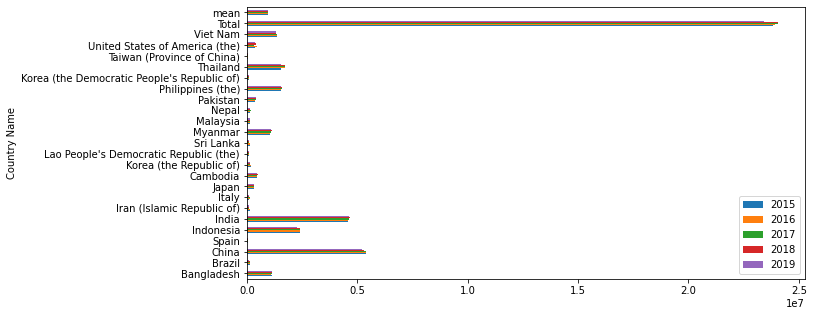

In [841]:
faostat_emissions_df.plot(kind = "barh", x = 'country_name', y = [2015, 2016, 2017, 2018, 2019], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,5))

### FAOSTAT Density Plot

<AxesSubplot:ylabel='Density'>

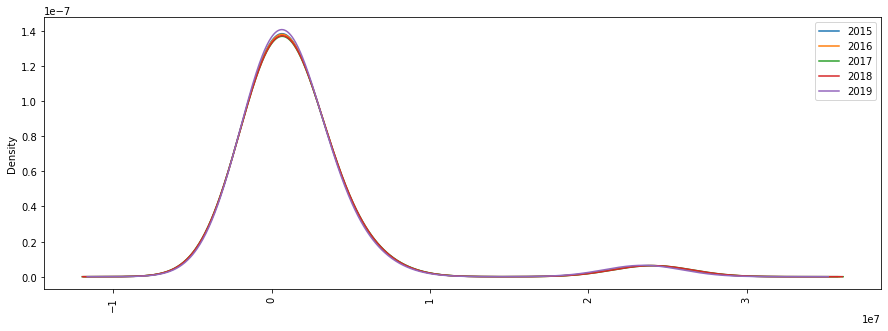

In [842]:
faostat_emissions_df.plot(rot = 90, kind = "density",y = [2015, 2016, 2017, 2018, 2019], figsize = (15,5)) 

The density plot is fairly consistent.  There is nearly no variation between nations and in total.  The 2020 data may show otherwise as the Malaysian data shows.  

## Join Df's by ISO3 Country

### Drop totals and means from the original df.

Because I am joining on iso3 country country code if the totals and means are located at different indexes we may experience merge and calculation errors

In [843]:
faostat_emissions_df = faostat_emissions_df[(faostat_emissions_df["country_name"] != "Total") & (faostat_emissions_df['country_name'] != 'mean')].copy()

In [844]:
malaysia_emissions_df = malaysia_emissions_df[(malaysia_emissions_df["country_name"] != "Total") & (malaysia_emissions_df['country_name'] != 'mean')].copy()

In [845]:
faostat_emissions_df

iso3_country                                 country_name       2015  \
0           BGD                                   Bangladesh  1131293.4   
1           BRA                                       Brazil   138910.3   
2           CHN                                        China  5406593.9   
3           ESP                                        Spain    55082.2   
4           IDN                                    Indonesia  2407953.5   
5           IND                                        India  4580248.4   
6           IRN                   Iran (Islamic Republic of)   116486.7   
7           ITA                                        Italy   114574.8   
8           JPN                                        Japan   330353.1   
9           KHM                                     Cambodia   436826.0   
10          KOR                      Korea (the Republic of)   167862.2   
11          LAO       Lao People's Democratic Republic (the)    94826.8   
12          LKA                                    Sri Lanka   132640.0   
13          MMR                                      Myanmar  1059409.6   
14          MYS                                     Malaysia   121942.6   
15          NPL                                        Nepal   149262.2   
16          PAK                                     Pakistan   383529.3   
17          PHL                            Philippines (the)  1557810.6   
18          PRK  Korea (the Democratic People's Republic of)    82823.3   
19          THA                                     Thailand  1554254.0   
20          TWN                   Taiwan (Province of China)    45838.7   
21          USA               United States of America (the)   364728.0   
22          VNM                                     Viet Nam  1381744.4   

         2016       2017       2018       2019  2020  2021    tCO2_2015  \
0   1093480.4  1154531.0  1144591.0  1144745.4   NaN   NaN   28282335.0   
1    126278.2   130322.9   121615.2   111084.8   NaN   NaN    3472757.5   
2   5399920.0  5400129.0  5302173.1  5214454.7   NaN   NaN  135164847.5   
3     55073.1    54232.4    52925.0    52098.5   NaN   NaN    1377055.0   
4   2387656.4  2425290.6  2405613.8  2257604.3   NaN   NaN   60198837.5   
5   4559136.4  4620790.8  4661154.9  4621416.8   NaN   NaN  114506210.0   
6    131008.5    87233.6    93936.6    96103.4   NaN   NaN    2912167.5   
7    118003.0   118003.0   109463.8   110895.1   NaN   NaN    2864370.0   
8    326403.0   323700.3   322245.0   320581.8   NaN   NaN    8258827.5   
9    459003.1   473745.3   479362.7   468378.9   NaN   NaN   10920650.0   
10   163534.1   158489.7   154911.3   153260.9   NaN   NaN    4196555.0   
11    95630.0    93940.7    83333.6    77005.5   NaN   NaN    2370670.0   
12   121756.3    84456.3   111049.0   102156.3   NaN   NaN    3316000.0   
13  1052287.7  1087029.5  1118850.0  1083100.3   NaN   NaN   26485240.0   
14   123232.8   122656.3   125238.5   122453.8   NaN   NaN    3048565.0   
15   142723.7   162574.6   153890.8   156215.4   NaN   NaN    3731555.0   
16   381361.8   406083.3   393404.2   424755.1   NaN   NaN    9588232.5   
17  1524292.5  1609862.5  1606047.8  1556225.8   NaN   NaN   38945265.0   
18    83442.3    84596.2    83943.3    82937.0   NaN   NaN    2070582.5   
19  1703327.7  1714465.6  1702989.1  1553835.5   NaN   NaN   38856350.0   
20    49838.3    49991.2    49414.1    49152.0   NaN   NaN    1145967.5   
21   438662.0   336255.5   412177.5   350136.5   NaN   NaN    9118200.0   
22  1365173.8  1360551.6  1336231.2  1318431.1   NaN   NaN   34543610.0   

      tCO2_2016    tCO2_2017    tCO2_2018    tCO2_2019    Mean_CH4  \
0    27337010.0   28863275.0   28614775.0   28618635.0  1133728.24   
1     3156955.0    3258072.5    3040380.0    2777120.0   125642.28   
2   134998000.0  135003225.0  132554327.5  130361367.5  5344654.14   
3     1376827.5    1355810.0    1323125.0    1302462.5    53882.24   
4    59691410.0   60632265.0   60140345.0   5644010

In [846]:
malaysia_emissions_df

iso3_country                                 country_name     tCH4_2015  \
0           BGD                                   Bangladesh  2.344420e+06   
1           BRA                                       Brazil  3.410233e+05   
2           CHN                                        China  6.133647e+06   
3           ESP                                        Spain  1.141464e+04   
4           IDN                                    Indonesia  1.283649e+06   
5           IND                                        India  6.219887e+06   
6           IRN                   Iran (Islamic Republic of)  8.774407e+04   
7           ITA                                        Italy  4.995968e+04   
8           JPN                                        Japan  2.305465e+05   
9           KHM                                     Cambodia  4.954698e+05   
10          KOR                      Korea (the Republic of)  1.451878e+05   
11          LAO       Lao People's Democratic Republic (the)  1.661169e+04   
12          LKA                                    Sri Lanka  8.305626e+04   
13          MMR                                      Myanmar  1.132082e+06   
14          MYS                                     Malaysia  1.057399e+05   
15          NPL                                        Nepal  1.007479e+05   
16          PAK                                     Pakistan  4.852431e+05   
17          PHL                            Philippines (the)  3.432021e+05   
18          PRK  Korea (the Democratic People's Republic of)  1.143217e+05   
19          THA                                     Thailand  1.393798e+06   
20          TWN                   Taiwan (Province of China)  7.866956e+04   
21          USA               United States of America (the)  1.611324e+05   
22          VNM                                     Viet Nam  1.346013e+06   

       tCH4_2016     tCH4_2017     tCH4_2018     tCH4_2019     tCH4_2020  \
0   2.278158e+06  2.098958e+06  2.141231e+06  2.070985e+06  2.106781e+06   
1   3.104189e+05  3.725173e+05  3.717030e+05  3.294713e+05  4.902874e+05   
2   5.859531e+06  6.355071e+06  5.413962e+06  5.603352e+06  6.402353e+06   
3   1.334803e+04  1.217299e+04  1.405410e+04  1.148324e+04  1.305461e+04   
4   1.023129e+06  9.615327e+05  1.176982e+06  1.266668e+06  1.188195e+06   
5   5.309413e+06  6.228451e+06  6.589798e+06  7.501556e+06  7.599764e+06   
6   9.180121e+04  9.620217e+04  8.875744e+04  9.500199e+04  9.600254e+04   
7   4.937785e+04  5.443679e+04  4.469902e+04  4.566914e+04  5.101547e+04   
8   2.284133e+05  2.708935e+05  1.548252e+05  2.332056e+05  2.835167e+05   
9   5.731698e+05  4.517045e+05  5.592610e+05  5.947277e+05  6.412802e+05   
10  1.274597e+05  1.463222e+05  1.293543e+05  1.327782e+05  1.165467e+05   
11  1.696441e+04  1.168063e+04  1.009675e+04  1.461058e+04  2.136270e+04   
12  1.011743e+05  5.911841e+04  9.018914e+04  8.476088e+04  9.248238e+04   
13  1.290806e+06  1.205169e+06  1.372447e+06  1.256888e+06  1.221904e+06   
14  1.110049e+05  1.111291e+05  1.066525e+05  1.056287e+05  1.127141e+05   
15  6.667161e+04  8.081300e+04  9.200752e+04  1.164235e+05  7.168401e+04   
16  5.945922e+05  5.372641e+05  4.532297e+05  6.528548e+05  6.401201e+05   
17  4.073554e+05  3.836830e+05  4.175210e+05  3.584550e+05  4.462836e+05   
18  9.177653e+04  1.085457e+05  8.662578e+04  9.655062e+04  8.581038e+04   
19  1.780993e+06  1.164699e+06  9.166575e+05  1.305046e+06  1.520788e+06   
20  8.089149e+04  8.705634e+04  8.138151e+04  8.990870e+04  8.333327e+04   
21  1.618576e+05  1.684799e+05  1.657254e+05  1.691351e+05  1.941455e+05   
22  1.483777e+06  1.406437e+06  1.317455e+06  1.269751e+06  1.374450e+06   

       tCH4_2021     tCO2_2015     tCO2_2016     tCO2_2017     tCO2_2018  \
0   1.983974e+06  5.861049e+07  5.695395e+07  5.247394e+07  5.353076e+07   
1   4.544874e+05  8.525583e+06  7.760473e+06  9.312934e+06  9.292575e+06   
2   6.068210e+06  1.533412e+08  1.464883e+08  1.588768e+08  1.353491e+08   
3

In [847]:
merged_df = faostat_emissions_df.merge(malaysia_emissions_df,suffixes=('_FAOSTAT', '_TRACE'), on='iso3_country', how='left', sort=False)

### Dropping 2020 and 2021 from the data sets

I will only compare data compiled from the same year. 

In [848]:
merged_df.drop([2020, 2021, "tCH4_2020","tCH4_2021"], axis = 1, inplace = True)

In [849]:
merged_df

iso3_country                         country_name_FAOSTAT       2015  \
0           BGD                                   Bangladesh  1131293.4   
1           BRA                                       Brazil   138910.3   
2           CHN                                        China  5406593.9   
3           ESP                                        Spain    55082.2   
4           IDN                                    Indonesia  2407953.5   
5           IND                                        India  4580248.4   
6           IRN                   Iran (Islamic Republic of)   116486.7   
7           ITA                                        Italy   114574.8   
8           JPN                                        Japan   330353.1   
9           KHM                                     Cambodia   436826.0   
10          KOR                      Korea (the Republic of)   167862.2   
11          LAO       Lao People's Democratic Republic (the)    94826.8   
12          LKA                                    Sri Lanka   132640.0   
13          MMR                                      Myanmar  1059409.6   
14          MYS                                     Malaysia   121942.6   
15          NPL                                        Nepal   149262.2   
16          PAK                                     Pakistan   383529.3   
17          PHL                            Philippines (the)  1557810.6   
18          PRK  Korea (the Democratic People's Republic of)    82823.3   
19          THA                                     Thailand  1554254.0   
20          TWN                   Taiwan (Province of China)    45838.7   
21          USA               United States of America (the)   364728.0   
22          VNM                                     Viet Nam  1381744.4   

         2016       2017       2018       2019  tCO2_2015_FAOSTAT  \
0   1093480.4  1154531.0  1144591.0  1144745.4         28282335.0   
1    126278.2   130322.9   121615.2   111084.8          3472757.5   
2   5399920.0  5400129.0  5302173.1  5214454.7        135164847.5   
3     55073.1    54232.4    52925.0    52098.5          1377055.0   
4   2387656.4  2425290.6  2405613.8  2257604.3         60198837.5   
5   4559136.4  4620790.8  4661154.9  4621416.8        114506210.0   
6    131008.5    87233.6    93936.6    96103.4          2912167.5   
7    118003.0   118003.0   109463.8   110895.1          2864370.0   
8    326403.0   323700.3   322245.0   320581.8          8258827.5   
9    459003.1   473745.3   479362.7   468378.9         10920650.0   
10   163534.1   158489.7   154911.3   153260.9          4196555.0   
11    95630.0    93940.7    83333.6    77005.5          2370670.0   
12   121756.3    84456.3   111049.0   102156.3          3316000.0   
13  1052287.7  1087029.5  1118850.0  1083100.3         26485240.0   
14   123232.8   122656.3   125238.5   122453.8          3048565.0   
15   142723.7   162574.6   153890.8   156215.4          3731555.0   
16   381361.8   406083.3   393404.2   424755.1          9588232.5   
17  1524292.5  1609862.5  1606047.8  1556225.8         38945265.0   
18    83442.3    84596.2    83943.3    82937.0          2070582.5   
19  1703327.7  1714465.6  1702989.1  1553835.5         38856350.0   
20    49838.3    49991.2    49414.1    49152.0          1145967.5   
21   438662.0   336255.5   412177.5   350136.5          9118200.0   
22  1365173.8  1360551.6  1336231.2  1318431.1         34543610.0   

    tCO2_2016_FAOSTAT  tCO2_2017_FAOSTAT  ...     tCH4_2019  tCO2_2015_TRACE  \
0          27337010.0         28863275.0  ...  2.070985e+06     5.861049e+07   
1           3156955.0          3258072.5  ...  3.294713e+05     8.525583e+06   
2         134998000.0        135003225.0  ...  5.603352e+06     1.533412e+08   
3           1376827.5          1355810.0  ...  1.148324e+04     2.853661e+05   
4          59691410.0         60632265.0  ...  1.266668e+06     3.209122e+07   
5         113978410.0        115519770.0  ...  7.501556e+06     1

### Calculate difference in Ch4 Tonnes Between the Estimates

In [850]:
# Calculate Difference in tons
merged_df['CH4_diff_2015'] = merged_df[2015] - merged_df['tCH4_2015']
merged_df['CH4_diff_2016'] = merged_df[2016] - merged_df['tCH4_2016']
merged_df['CH4_diff_2017'] = merged_df[2017] - merged_df['tCH4_2017']
merged_df['CH4_diff_2018'] = merged_df[2018] - merged_df['tCH4_2018']
merged_df['CH4_diff_2019'] = merged_df[2019] - merged_df['tCH4_2019']
merged_df['CH4_diff_means'] = merged_df['Mean_CH4_FAOSTAT'] - merged_df['Mean_CH4_TRACE']
merged_df['CH4_diff_totals'] = merged_df['Total_CH4_FAOSTAT'] - merged_df['Total_CH4_TRACE']



In [851]:
merged_df

iso3_country                         country_name_FAOSTAT       2015  \
0           BGD                                   Bangladesh  1131293.4   
1           BRA                                       Brazil   138910.3   
2           CHN                                        China  5406593.9   
3           ESP                                        Spain    55082.2   
4           IDN                                    Indonesia  2407953.5   
5           IND                                        India  4580248.4   
6           IRN                   Iran (Islamic Republic of)   116486.7   
7           ITA                                        Italy   114574.8   
8           JPN                                        Japan   330353.1   
9           KHM                                     Cambodia   436826.0   
10          KOR                      Korea (the Republic of)   167862.2   
11          LAO       Lao People's Democratic Republic (the)    94826.8   
12          LKA                                    Sri Lanka   132640.0   
13          MMR                                      Myanmar  1059409.6   
14          MYS                                     Malaysia   121942.6   
15          NPL                                        Nepal   149262.2   
16          PAK                                     Pakistan   383529.3   
17          PHL                            Philippines (the)  1557810.6   
18          PRK  Korea (the Democratic People's Republic of)    82823.3   
19          THA                                     Thailand  1554254.0   
20          TWN                   Taiwan (Province of China)    45838.7   
21          USA               United States of America (the)   364728.0   
22          VNM                                     Viet Nam  1381744.4   

         2016       2017       2018       2019  tCO2_2015_FAOSTAT  \
0   1093480.4  1154531.0  1144591.0  1144745.4         28282335.0   
1    126278.2   130322.9   121615.2   111084.8          3472757.5   
2   5399920.0  5400129.0  5302173.1  5214454.7        135164847.5   
3     55073.1    54232.4    52925.0    52098.5          1377055.0   
4   2387656.4  2425290.6  2405613.8  2257604.3         60198837.5   
5   4559136.4  4620790.8  4661154.9  4621416.8        114506210.0   
6    131008.5    87233.6    93936.6    96103.4          2912167.5   
7    118003.0   118003.0   109463.8   110895.1          2864370.0   
8    326403.0   323700.3   322245.0   320581.8          8258827.5   
9    459003.1   473745.3   479362.7   468378.9         10920650.0   
10   163534.1   158489.7   154911.3   153260.9          4196555.0   
11    95630.0    93940.7    83333.6    77005.5          2370670.0   
12   121756.3    84456.3   111049.0   102156.3          3316000.0   
13  1052287.7  1087029.5  1118850.0  1083100.3         26485240.0   
14   123232.8   122656.3   125238.5   122453.8          3048565.0   
15   142723.7   162574.6   153890.8   156215.4          3731555.0   
16   381361.8   406083.3   393404.2   424755.1          9588232.5   
17  1524292.5  1609862.5  1606047.8  1556225.8         38945265.0   
18    83442.3    84596.2    83943.3    82937.0          2070582.5   
19  1703327.7  1714465.6  1702989.1  1553835.5         38856350.0   
20    49838.3    49991.2    49414.1    49152.0          1145967.5   
21   438662.0   336255.5   412177.5   350136.5          9118200.0   
22  1365173.8  1360551.6  1336231.2  1318431.1         34543610.0   

    tCO2_2016_FAOSTAT  tCO2_2017_FAOSTAT  ...  Total_CH4_TRACE  \
0          27337010.0         28863275.0  ...     1.093375e+07   
1           3156955.0          3258072.5  ...     1.725134e+06   
2         134998000.0        135003225.0  ...     2.936556e+07   
3           1376827.5          1355810.0  ...     6.247300e+04   
4          59691410.0         60632265.0  ...     5.711960e+06   
5         113978410.0        115519770.0  ...     3.184910e+07   
6           3275212.5          2180840.0  ...     4.595069e+05   
7           29500

### Calculate difference in C02 Tonnes Between the Estimates

In [852]:
# Calculate Difference in tons
merged_df['CO2_diff_2015'] = merged_df['tCO2_2015_FAOSTAT'] - merged_df['tCO2_2015_TRACE']
merged_df['CO2_diff_2016'] = merged_df['tCO2_2016_FAOSTAT'] - merged_df['tCO2_2016_TRACE']
merged_df['CO2_diff_2017'] = merged_df['tCO2_2017_FAOSTAT'] - merged_df['tCO2_2017_TRACE']
merged_df['CO2_diff_2018'] = merged_df['tCO2_2018_FAOSTAT'] - merged_df['tCO2_2018_TRACE']
merged_df['CO2_diff_2019'] = merged_df['tCO2_2019_FAOSTAT'] - merged_df['tCO2_2019_TRACE']
merged_df['CO2_diff_means'] = merged_df['Mean_CO2_FAOSTAT'] - merged_df['Mean_CO2_TRACE']
merged_df['CO2_diff_totals'] = merged_df['Total_CO2_FAOSTAT'] - merged_df['Total_CO2_TRACE']



### Calculating the CH4 Percent Differences Between the Estimates

In [853]:
## Calculate Percent Differnces on this data set )*100
# With raw data i could have accomplished this with a groupby.aggregate(lambda x ), however the pivot tables given are not easy to apply #vectorized functions across time series
merged_df['CH4_abs_percent_diff_2015'] = ((abs(merged_df[2015] - merged_df['tCH4_2015']))/((merged_df[2015] + merged_df['tCH4_2015'])/2))*100
merged_df['CH4_abs_percent_diff_2016'] = ((abs((merged_df[2016] - merged_df['tCH4_2016']))/((merged_df[2016] + merged_df['tCH4_2016'])/2)))*100
merged_df['CH4_abs_percent_diff_2017'] = ((abs(merged_df[2017] - merged_df['tCH4_2017']))/((merged_df[2017] + merged_df['tCH4_2017'])/2))*100
merged_df['CH4_abs_percent_diff_2018'] = (abs((merged_df[2018] - merged_df['tCH4_2018']))/((merged_df[2018] + merged_df['tCH4_2018'])/2))*100
merged_df['CH4_abs_percent_diff_2019'] = (abs((merged_df[2019] - merged_df['tCH4_2019']))/((merged_df[2019] + merged_df['tCH4_2019'])/2))*100
merged_df['CH4_abs_percent_diff_means'] = (abs((merged_df['Mean_CH4_FAOSTAT'] - merged_df['Mean_CH4_TRACE']))/((merged_df['Mean_CH4_FAOSTAT'] + merged_df['Mean_CH4_TRACE'])/2))* 100
merged_df['CH4_abs_percent_diff_totals'] = (abs((merged_df['Total_CH4_FAOSTAT'] - merged_df['Total_CH4_TRACE']))/((merged_df['Total_CH4_TRACE'] + merged_df['Total_CH4_FAOSTAT'])/2))*100


merged_df['CH4_relative_percent_diff_2015'] = ((merged_df[2015] - merged_df['tCH4_2015'])/(merged_df[2015]))*100
merged_df['CH4_relative_percent_diff_2016'] = ((merged_df[2016] - merged_df['tCH4_2016'])/(merged_df[2016]))*100
merged_df['CH4_relative_percent_diff_2017'] = ((merged_df[2017] - merged_df['tCH4_2017'])/(merged_df[2017]))*100
merged_df['CH4_relative_percent_diff_2018'] = ((merged_df[2018] - merged_df['tCH4_2018'])/(merged_df[2018]))*100
merged_df['CH4_relative_percent_diff_2019'] = ((merged_df[2019] - merged_df['tCH4_2019'])/(merged_df[2019]))*100
merged_df['CH4_relative_percent_diff_means'] = ((merged_df['Mean_CH4_FAOSTAT'] - merged_df['Mean_CH4_TRACE'])/(merged_df["Mean_CH4_FAOSTAT"]))*100
merged_df['CH4_relative_percent_diff_totals'] = ((merged_df['Total_CH4_FAOSTAT'] - merged_df['Total_CH4_TRACE'])/(merged_df["Total_CH4_FAOSTAT"]))*100


### Calculate CO2 Differences 

In [854]:
## Calculate Percent Differnces on this data set )*100
# With raw data i could have accomplished this with a groupby.aggregate(lambda x ), however the pivot tables given are not easy to apply #vectorized functions across time series
merged_df['CO2_abs_percent_diff_2015'] = (abs((merged_df['tCO2_2015_FAOSTAT'] - merged_df['tCO2_2015_TRACE']))/((merged_df['tCO2_2015_TRACE'] + merged_df['tCO2_2015_FAOSTAT'])/2))*100
merged_df['CO2_abs_percent_diff_2016'] = ((abs(merged_df['tCO2_2016_FAOSTAT'] - merged_df['tCO2_2016_TRACE']))/((merged_df['tCO2_2016_TRACE'] + merged_df['tCO2_2016_FAOSTAT'])/2))*100
merged_df['CO2_abs_percent_diff_2017'] = ((abs(merged_df['tCO2_2017_FAOSTAT'] - merged_df['tCO2_2017_TRACE']))/((merged_df['tCO2_2017_TRACE'] + merged_df['tCO2_2017_FAOSTAT'])/2))*100
merged_df['CO2_abs_percent_diff_2018'] = ((abs(merged_df['tCO2_2018_FAOSTAT'] - merged_df['tCO2_2018_TRACE']))/((merged_df['tCO2_2018_TRACE'] + merged_df['tCO2_2018_FAOSTAT'])/2))*100
merged_df['CO2_abs_percent_diff_2019'] = ((abs(merged_df['tCO2_2019_FAOSTAT'] - merged_df['tCO2_2019_TRACE']))/((merged_df['tCO2_2019_TRACE'] + merged_df['tCO2_2019_FAOSTAT'])/2))*100
merged_df['CO2_abs_percent_diff_means'] = ((abs(merged_df['Mean_CO2_FAOSTAT'] - merged_df['Mean_CO2_TRACE']))/((merged_df['Mean_CO2_FAOSTAT'] + merged_df['Mean_CO2_TRACE'])/2))* 100
merged_df['CO2_abs_percent_diff_totals'] = ((abs(merged_df['Total_CO2_FAOSTAT'] - merged_df['Total_CO2_TRACE']))/((merged_df['Total_CO2_TRACE'] + merged_df['Total_CO2_FAOSTAT'])/2))*100


merged_df['CO2_relative_percent_diff_2015'] = ((merged_df['tCO2_2015_FAOSTAT']  - merged_df['tCO2_2015_TRACE'])/(merged_df['tCO2_2015_FAOSTAT']))*100
merged_df['CO2_relative_percent_diff_2016'] = ((merged_df['tCO2_2016_FAOSTAT']  - merged_df['tCO2_2016_TRACE'])/(merged_df['tCO2_2016_FAOSTAT']))*100
merged_df['CO2_relative_percent_diff_2017'] = ((merged_df['tCO2_2017_FAOSTAT']  - merged_df['tCO2_2017_TRACE'])/(merged_df['tCO2_2017_FAOSTAT']))*100
merged_df['CO2_relative_percent_diff_2018'] = ((merged_df['tCO2_2018_FAOSTAT']  - merged_df['tCO2_2018_TRACE'])/(merged_df['tCO2_2018_FAOSTAT']))*100
merged_df['CO2_relative_percent_diff_2019'] = ((merged_df['tCO2_2019_FAOSTAT']  - merged_df['tCO2_2019_TRACE'])/(merged_df['tCO2_2019_FAOSTAT']))*100
merged_df['CO2_relative_percent_diff_means'] = ((merged_df["Mean_CO2_FAOSTAT"] - merged_df['Mean_CO2_TRACE'])/(merged_df["Mean_CO2_FAOSTAT"]))*100
merged_df['CO2_relative_percent_diff_totals'] = ((merged_df['Total_CO2_FAOSTAT'] - merged_df['Total_CO2_TRACE'])/(merged_df["Total_CO2_FAOSTAT"]))*100

In [855]:
merged_df

iso3_country                         country_name_FAOSTAT       2015  \
0           BGD                                   Bangladesh  1131293.4   
1           BRA                                       Brazil   138910.3   
2           CHN                                        China  5406593.9   
3           ESP                                        Spain    55082.2   
4           IDN                                    Indonesia  2407953.5   
5           IND                                        India  4580248.4   
6           IRN                   Iran (Islamic Republic of)   116486.7   
7           ITA                                        Italy   114574.8   
8           JPN                                        Japan   330353.1   
9           KHM                                     Cambodia   436826.0   
10          KOR                      Korea (the Republic of)   167862.2   
11          LAO       Lao People's Democratic Republic (the)    94826.8   
12          LKA                                    Sri Lanka   132640.0   
13          MMR                                      Myanmar  1059409.6   
14          MYS                                     Malaysia   121942.6   
15          NPL                                        Nepal   149262.2   
16          PAK                                     Pakistan   383529.3   
17          PHL                            Philippines (the)  1557810.6   
18          PRK  Korea (the Democratic People's Republic of)    82823.3   
19          THA                                     Thailand  1554254.0   
20          TWN                   Taiwan (Province of China)    45838.7   
21          USA               United States of America (the)   364728.0   
22          VNM                                     Viet Nam  1381744.4   

         2016       2017       2018       2019  tCO2_2015_FAOSTAT  \
0   1093480.4  1154531.0  1144591.0  1144745.4         28282335.0   
1    126278.2   130322.9   121615.2   111084.8          3472757.5   
2   5399920.0  5400129.0  5302173.1  5214454.7        135164847.5   
3     55073.1    54232.4    52925.0    52098.5          1377055.0   
4   2387656.4  2425290.6  2405613.8  2257604.3         60198837.5   
5   4559136.4  4620790.8  4661154.9  4621416.8        114506210.0   
6    131008.5    87233.6    93936.6    96103.4          2912167.5   
7    118003.0   118003.0   109463.8   110895.1          2864370.0   
8    326403.0   323700.3   322245.0   320581.8          8258827.5   
9    459003.1   473745.3   479362.7   468378.9         10920650.0   
10   163534.1   158489.7   154911.3   153260.9          4196555.0   
11    95630.0    93940.7    83333.6    77005.5          2370670.0   
12   121756.3    84456.3   111049.0   102156.3          3316000.0   
13  1052287.7  1087029.5  1118850.0  1083100.3         26485240.0   
14   123232.8   122656.3   125238.5   122453.8          3048565.0   
15   142723.7   162574.6   153890.8   156215.4          3731555.0   
16   381361.8   406083.3   393404.2   424755.1          9588232.5   
17  1524292.5  1609862.5  1606047.8  1556225.8         38945265.0   
18    83442.3    84596.2    83943.3    82937.0          2070582.5   
19  1703327.7  1714465.6  1702989.1  1553835.5         38856350.0   
20    49838.3    49991.2    49414.1    49152.0          1145967.5   
21   438662.0   336255.5   412177.5   350136.5          9118200.0   
22  1365173.8  1360551.6  1336231.2  1318431.1         34543610.0   

    tCO2_2016_FAOSTAT  tCO2_2017_FAOSTAT  ...  CO2_abs_percent_diff_2019  \
0          27337010.0         28863275.0  ...                  57.606797   
1           3156955.0          3258072.5  ...                  99.141295   
2         134998000.0        135003225.0  ...                   7.189945   
3           1376827.5          1355810.0  ...                 127.757634   
4          59691410.0         60632265.0  ...                  56.234955   
5         113978410.0        115519770.0  ...                  47.515394   
6           3

### Recalculate Means

In [856]:
merged_df.loc['mean'] = merged_df.select_dtypes(np.number).mean()


In [857]:
merged_df.at['mean','country_name_FAOSTAT'] = 'mean'
merged_df.at['mean','country_name_TRACE'] = 'mean'

In [858]:
merged_df

iso3_country                         country_name_FAOSTAT       2015  \
0             BGD                                   Bangladesh  1131293.4   
1             BRA                                       Brazil   138910.3   
2             CHN                                        China  5406593.9   
3             ESP                                        Spain    55082.2   
4             IDN                                    Indonesia  2407953.5   
5             IND                                        India  4580248.4   
6             IRN                   Iran (Islamic Republic of)   116486.7   
7             ITA                                        Italy   114574.8   
8             JPN                                        Japan   330353.1   
9             KHM                                     Cambodia   436826.0   
10            KOR                      Korea (the Republic of)   167862.2   
11            LAO       Lao People's Democratic Republic (the)    94826.8   
12            LKA                                    Sri Lanka   132640.0   
13            MMR                                      Myanmar  1059409.6   
14            MYS                                     Malaysia   121942.6   
15            NPL                                        Nepal   149262.2   
16            PAK                                     Pakistan   383529.3   
17            PHL                            Philippines (the)  1557810.6   
18            PRK  Korea (the Democratic People's Republic of)    82823.3   
19            THA                                     Thailand  1554254.0   
20            TWN                   Taiwan (Province of China)    45838.7   
21            USA               United States of America (the)   364728.0   
22            VNM                                     Viet Nam  1381744.4   
mean          NaN                                         mean   948478.0   

              2016          2017          2018          2019  \
0     1.093480e+06  1.154531e+06  1.144591e+06  1.144745e+06   
1     1.262782e+05  1.303229e+05  1.216152e+05  1.110848e+05   
2     5.399920e+06  5.400129e+06  5.302173e+06  5.214455e+06   
3     5.507310e+04  5.423240e+04  5.292500e+04  5.209850e+04   
4     2.387656e+06  2.425291e+06  2.405614e+06  2.257604e+06   
5     4.559136e+06  4.620791e+06  4.661155e+06  4.621417e+06   
6     1.310085e+05  8.723360e+04  9.393660e+04  9.610340e+04   
7     1.180030e+05  1.180030e+05  1.094638e+05  1.108951e+05   
8     3.264030e+05  3.237003e+05  3.222450e+05  3.205818e+05   
9     4.590031e+05  4.737453e+05  4.793627e+05  4.683789e+05   
10    1.635341e+05  1.584897e+05  1.549113e+05  1.532609e+05   
11    9.563000e+04  9.394070e+04  8.333360e+04  7.700550e+04   
12    1.217563e+05  8.445630e+04  1.110490e+05  1.021563e+05   
13    1.052288e+06  1.087030e+06  1.118850e+06  1.083100e+06   
14    1.232328e+05  1.226563e+05  1.252385e+05  1.224538e+05   
15    1.427237e+05  1.625746e+05  1.538908e+05  1.562154e+05   
16    3.813618e+05  4.060833e+05  3.934042e+05  4.247551e+05   
17    1.524292e+06  1.609862e+06  1.606048e+06  1.556226e+06   
18    8.344230e+04  8.459620e+04  8.394330e+04  8.293700e+04   
19    1.703328e+06  1.714466e+06  1.702989e+06  1.553836e+06   
20    4.983830e+04  4.999120e+04  4.941410e+04  4.915200e+04   
21    4.386620e+05  3.362555e+05  4.121775e+05  3.501365e+05   
22    1.365174e+06  1.360552e+06  1.336231e+06  1.318431e+06   
mean  9.522272e+05  9.590840e+05  9.575896e+05  9.316100e+05   

      tCO2_2015_FAOSTAT  tCO2_2016_FAOSTAT  tCO2_2017_FAOSTAT  ...  \
0            28282335.0       2.733701e+07       2.886328e+07  ...   
1             3472757.5       3.156955e+06       3.258072e+06  ...   
2           135164847.5       1.349980e+08       1.350032e+08  ...   
3             1377055.0       1.376828e+06       1.355810e+06  ...   
4            60198837.5       5.969141e+07       6.063226e+07  ...   
5           114506210.0       1.139784e+08       1.155198e

### Recalculate Totals

In [859]:
merged_df.loc['total'] = merged_df[merged_df['country_name_FAOSTAT'] != 'mean'].select_dtypes(np.number).sum()

In [860]:
merged_df.at['total','country_name_FAOSTAT'] = 'total'
merged_df.at['total','country_name_TRACE'] = 'total'

In [861]:
merged_df.reset_index(inplace=True, drop = True)

In [862]:
merged_df

iso3_country                         country_name_FAOSTAT        2015  \
0           BGD                                   Bangladesh   1131293.4   
1           BRA                                       Brazil    138910.3   
2           CHN                                        China   5406593.9   
3           ESP                                        Spain     55082.2   
4           IDN                                    Indonesia   2407953.5   
5           IND                                        India   4580248.4   
6           IRN                   Iran (Islamic Republic of)    116486.7   
7           ITA                                        Italy    114574.8   
8           JPN                                        Japan    330353.1   
9           KHM                                     Cambodia    436826.0   
10          KOR                      Korea (the Republic of)    167862.2   
11          LAO       Lao People's Democratic Republic (the)     94826.8   
12          LKA                                    Sri Lanka    132640.0   
13          MMR                                      Myanmar   1059409.6   
14          MYS                                     Malaysia    121942.6   
15          NPL                                        Nepal    149262.2   
16          PAK                                     Pakistan    383529.3   
17          PHL                            Philippines (the)   1557810.6   
18          PRK  Korea (the Democratic People's Republic of)     82823.3   
19          THA                                     Thailand   1554254.0   
20          TWN                   Taiwan (Province of China)     45838.7   
21          USA               United States of America (the)    364728.0   
22          VNM                                     Viet Nam   1381744.4   
23          NaN                                         mean    948478.0   
24          NaN                                        total  21814994.0   

            2016          2017          2018          2019  tCO2_2015_FAOSTAT  \
0   1.093480e+06  1.154531e+06  1.144591e+06  1.144745e+06         28282335.0   
1   1.262782e+05  1.303229e+05  1.216152e+05  1.110848e+05          3472757.5   
2   5.399920e+06  5.400129e+06  5.302173e+06  5.214455e+06        135164847.5   
3   5.507310e+04  5.423240e+04  5.292500e+04  5.209850e+04          1377055.0   
4   2.387656e+06  2.425291e+06  2.405614e+06  2.257604e+06         60198837.5   
5   4.559136e+06  4.620791e+06  4.661155e+06  4.621417e+06        114506210.0   
6   1.310085e+05  8.723360e+04  9.393660e+04  9.610340e+04          2912167.5   
7   1.180030e+05  1.180030e+05  1.094638e+05  1.108951e+05          2864370.0   
8   3.264030e+05  3.237003e+05  3.222450e+05  3.205818e+05          8258827.5   
9   4.590031e+05  4.737453e+05  4.793627e+05  4.683789e+05         10920650.0   
10  1.635341e+05  1.584897e+05  1.549113e+05  1.532609e+05          4196555.0   
11  9.563000e+04  9.394070e+04  8.333360e+04  7.700550e+04          2370670.0   
12  1.217563e+05  8.445630e+04  1.110490e+05  1.021563e+05          3316000.0   
13  1.052288e+06  1.087030e+06  1.118850e+06  1.083100e+06         26485240.0   
14  1.232328e+05  1.226563e+05  1.252385e+05  1.224538e+05          3048565.0   
15  1.427237e+05  1.625746e+05  1.538908e+05  1.562154e+05          3731555.0   
16  3.813618e+05  4.060833e+05  3.934042e+05  4.247551e+05          9588232.5   
17  1.524292e+06  1.609862e+06  1.606048e+06  1.556226e+06         38945265.0   
18  8.344230e+04  8.459620e+04  8.394330e+04  8.293700e+04          2070582.5   
19  1.703328e+06  1.714466e+06  1.702989e+06  1.553836e+06         38856350.0   
20  4.983830e+04  4.999120e+04  4.941410e+04  4.915200e+04          1145967.5   
21  4.386620e+05  3.362555e+05  4.121775e+05  3.501365e+05          9118200.0   
22  1.365174e+06  1.360552e+06  1.336231e+06  1.318431e+06         34543610.0   
23  9.522272e+05  9.590840e+05  9.575896e+05  9.316100e+05         23711950.0   
2

### Merged Data to File

In [863]:
outfile = "/Users/jnapolitano/Projects/wattime-takehome/data/MERGED_DATA.csv"

merged_df.to_csv(outfile)

### CO2 Difference Plots

<AxesSubplot:ylabel='Country Name'>

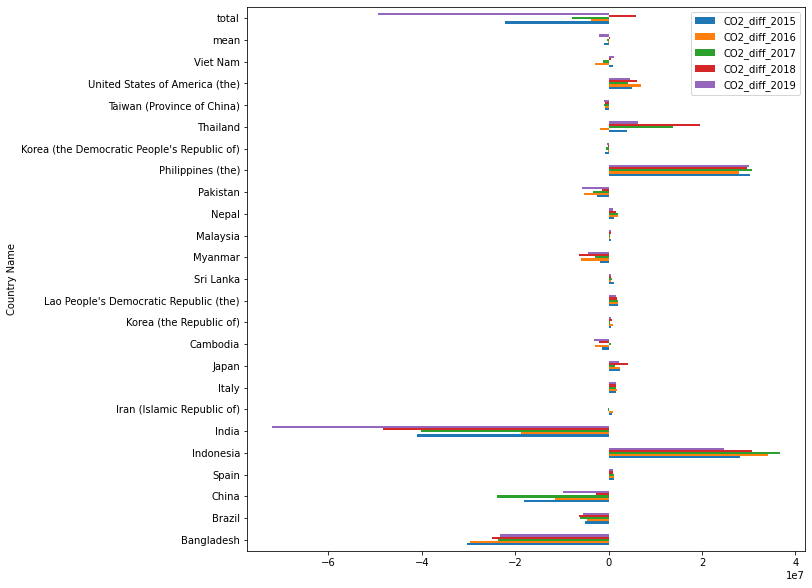

In [864]:
merged_df.plot(kind = "barh", x = 'country_name_FAOSTAT', y = ["CO2_diff_2015", "CO2_diff_2016",	"CO2_diff_2017", "CO2_diff_2018", "CO2_diff_2019"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference Plot

<AxesSubplot:ylabel='Country Name'>

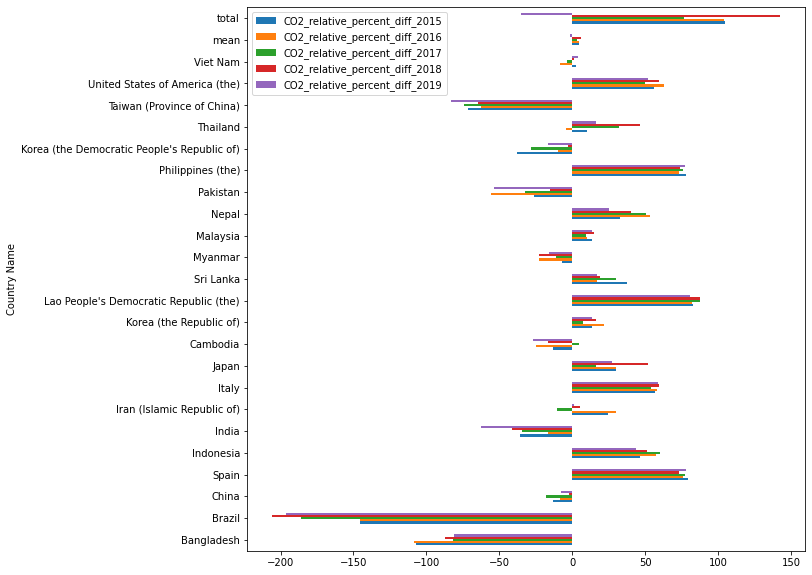

In [892]:
merged_df.plot(kind = "barh", x = 'country_name_FAOSTAT', y = ["CO2_relative_percent_diff_2015", "CO2_relative_percent_diff_2016",	"CO2_relative_percent_diff_2017", "CO2_relative_percent_diff_2018", "CO2_relative_percent_diff_2019"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

### Impressions

#### Initial 

The percent difference and the tonnege difference do not support each other.  I need to recalculate the totals section to ensure that we are doing things correctly.  

I need to confirm the values, but I'm initially impressed by the fact that the faostat data reports higher values than the malaysia data on average.  According to the included paper this shold not be the case.  

The quote included below states the problems with the malysia methodology.  

"The difference between harvested rice cultivation area from statistical data and remote-sensing estimates can be due to two factors: (i) MODIS data which have moderate spatial resolution lead to mixed pixels, where rice fields and non-rice fields are combined. This can overestimate area, especially in lowland regions and have a low ability to detect small rice field patches in upland regions (Frolking et al 1999, Seto et al 2000); and (ii) political and policy factors (Yan et al., 2019) such as determination of the amount of subsidies for fertilizers and evaluation of achievement of government programs in the agricultural sector.
Other factors that contribute to discrepancy in CH4 emission are from different emission and scale factors that are related to water regime and organic amendment. These values give high uncertainty since the availability of these data are limited and quite variable."

#### Verified

I calculated differences totals and means per dataframe to ensure accuracy prior to the join.  I also dropped precalcuated values when joining to ensure that the aggregation algorithms to not modify the results. 

The data is now consistent and supports the findings of the University of Malaysia Paper  

## Recreating the Malysia Paper.  

### University of Malaysia Data

In [866]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

In [867]:
# Selecting 2020 columns
malaysia_2020 = malaysia_emissions_df[["iso3_country","country_name", "tCH4_2020"]].copy()

In [868]:
malaysia_2020

iso3_country                                 country_name     tCH4_2020
0           BGD                                   Bangladesh  2.106781e+06
1           BRA                                       Brazil  4.902874e+05
2           CHN                                        China  6.402353e+06
3           ESP                                        Spain  1.305461e+04
4           IDN                                    Indonesia  1.188195e+06
5           IND                                        India  7.599764e+06
6           IRN                   Iran (Islamic Republic of)  9.600254e+04
7           ITA                                        Italy  5.101547e+04
8           JPN                                        Japan  2.835167e+05
9           KHM                                     Cambodia  6.412802e+05
10          KOR                      Korea (the Republic of)  1.165467e+05
11          LAO       Lao People's Democratic Republic (the)  2.136270e+04
12          LKA                                    Sri Lanka  9.248238e+04
13          MMR                                      Myanmar  1.221904e+06
14          MYS                                     Malaysia  1.127141e+05
15          NPL                                        Nepal  7.168401e+04
16          PAK                                     Pakistan  6.401201e+05
17          PHL                            Philippines (the)  4.462836e+05
18          PRK  Korea (the Democratic People's Republic of)  8.581038e+04
19          THA                                     Thailand  1.520788e+06
20          TWN                   Taiwan (Province of China)  8.333327e+04
21          USA               United States of America (the)  1.941455e+05
22          VNM                                     Viet Nam  1.374450e+06
23          NaN                                        Total  2.485387e+07

## FAOSTAT Data 2019

In [869]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

In [870]:
faostat_2019 = faostat_emissions_df[['code', 'country', 'country_fao', 2019]].copy()

In [871]:
faostat_2019

code                                      country  \
0   BGD                                   Bangladesh   
1   BRA                                       Brazil   
2   CHN                                        China   
3   ESP                                        Spain   
4   IDN                                    Indonesia   
5   IND                                        India   
6   IRN                   Iran (Islamic Republic of)   
7   ITA                                        Italy   
8   JPN                                        Japan   
9   KHM                                     Cambodia   
10  KOR                      Korea (the Republic of)   
11  LAO       Lao People's Democratic Republic (the)   
12  LKA                                    Sri Lanka   
13  MMR                                      Myanmar   
14  MYS                                     Malaysia   
15  NPL                                        Nepal   
16  PAK                                     Pakistan   
17  PHL                            Philippines (the)   
18  PRK  Korea (the Democratic People's Republic of)   
19  THA                                     Thailand   
20  TWN                   Taiwan (Province of China)   
21  USA               United States of America (the)   
22  VNM                                     Viet Nam   
23  NaN                                          NaN   

                              country_fao        2019  
0                              Bangladesh   1144745.4  
1                                  Brazil    111084.8  
2                         China, mainland   5214454.7  
3                                   Spain     52098.5  
4                               Indonesia   2257604.3  
5                                   India   4621416.8  
6              Iran (Islamic Republic of)     96103.4  
7                                   Italy    110895.1  
8                                   Japan    320581.8  
9                                Cambodia    468378.9  
10                      Republic of Korea    153260.9  
11       Lao People's Democratic Republic     77005.5  
12                              Sri Lanka    102156.3  
13                                Myanmar   1083100.3  
14                               Malaysia    122453.8  
15                                  Nepal    156215.4  
16                               Pakistan    424755.1  
17                            Philippines   1556225.8  
18  Democratic People's Republic of Korea     82937.0  
19                               Thailand   1553835.5  
20              China, Taiwan Province of     49152.0  
21               United States of America    350136.5  
22                               Viet Nam   1318431.1  
23                                  Total  23446028.9

In [872]:
faostat_2019.rename(columns={"code": "iso3_country"}, inplace =True)

## Merging Data on Iso3 Country Code

In [873]:
merged2020_df = faostat_2019.merge(malaysia_2020, on='iso3_country', how='left', sort=False)

In [874]:
merged2020_df

iso3_country                                      country  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2019  \
0                              Bangladesh   1144745.4   
1                                  Brazil    111084.8   
2                         China, mainland   5214454.7   
3                                   Spain     52098.5   
4                               Indonesia   2257604.3   
5                                   India   4621416.8   
6              Iran (Islamic Republic of)     96103.4   
7                                   Italy    110895.1   
8                                   Japan    320581.8   
9                                Cambodia    468378.9   
10                      Republic of Korea    153260.9   
11       Lao People's Democratic Republic     77005.5   
12                              Sri Lanka    102156.3   
13                                Myanmar   1083100.3   
14                               Malaysia    122453.8   
15                                  Nepal    156215.4   
16                               Pakistan    424755.1   
17                            Philippines   1556225.8   
18  Democratic People's Republic of Korea     82937.0   
19                               Thailand   1553835.5   
20              China, Taiwan Province of     49152.0   
21               United States of America    350136.5   
22                               Viet Nam   1318431.1   
23                                  Total  23446028.9   

                                   country_name     tCH4_2020  
0                                    Bangladesh  2.106781e+06  
1                                        Brazil  4.902874e+05  
2                                         China  6.402353e+06  
3                                         Spain  1.305461e+04  
4                                     Indonesia  1.188195e+06  
5                                         India  7.599764e+06  
6                    Iran (Islamic Republic of)  9.600254e+04  
7                                         Italy  5.101547e+04  
8                                         Japan  2.835167e+05  
9                                      Cambodia  6.412802e+05  
10                      Korea (the Republic of)  1.165467e+05  
11       Lao People's Democratic Republic (the)  2.136270e+04  
12                                    Sri Lanka  9.248238e+04  
13                                      Myanmar  1.221904e+06  
14              

### Calculate difference in Tonnes Between the Estimates

In [875]:
# Calculate Difference in tons
merged2020_df['diff_2020'] = merged2020_df[2019] - merged2020_df['tCH4_2020']




### Calculating the Percent Differences Between the Estimates

In [890]:
merged2020_df['abs_percent_diff_2020'] = (abs((merged2020_df[2019] - merged2020_df['tCH4_2020']))/(merged2020_df[2019] + merged2020_df["tCH4_2020"])/2)*100

merged2020_df['relative_percent_diff_2020'] = (merged2020_df[2019] - merged2020_df['tCH4_2020'])/(merged2020_df[2019])*100



In [891]:
merged2020_df

iso3_country                                      country  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2019  \
0                              Bangladesh   1144745.4   
1                                  Brazil    111084.8   
2                         China, mainland   5214454.7   
3                                   Spain     52098.5   
4                               Indonesia   2257604.3   
5                                   India   4621416.8   
6              Iran (Islamic Republic of)     96103.4   
7                                   Italy    110895.1   
8                                   Japan    320581.8   
9                                Cambodia    468378.9   
10                      Republic of Korea    153260.9   
11       Lao People's Democratic Republic     77005.5   
12                              Sri Lanka    102156.3   
13                                Myanmar   1083100.3   
14                               Malaysia    122453.8   
15                                  Nepal    156215.4   
16                               Pakistan    424755.1   
17                            Philippines   1556225.8   
18  Democratic People's Republic of Korea     82937.0   
19                               Thailand   1553835.5   
20              China, Taiwan Province of     49152.0   
21               United States of America    350136.5   
22                               Viet Nam   1318431.1   
23                                  Total  23446028.9   

                                   country_name     tCH4_2020     diff_2020  \
0                                    Bangladesh  2.106781e+06 -9.620360e+05   
1                                        Brazil  4.902874e+05 -3.792026e+05   
2                                         China  6.402353e+06 -1.187898e+06   
3                                         Spain  1.305461e+04  3.904389e+04   
4                                     Indonesia  1.188195e+06  1.069409e+06   
5                                         India  7.599764e+06 -2.978347e+06   
6                    Iran (Islamic Republic of)  9.600254e+04  1.008569e+02   
7                                         Italy  5.101547e+04  5.987963e+04   
8                                         Japan  2.835167e+05  3.706513e+04   
9                                      Cambodia  6.412802e+05 -1.729013e+05   
10                      Korea (the Republic of)  1.165467e+05  3.671416e+04   
11       Lao People's Democr

### Tonnes CH4 FAOSTAT - TRACE Plot

<AxesSubplot:ylabel='Country Name'>

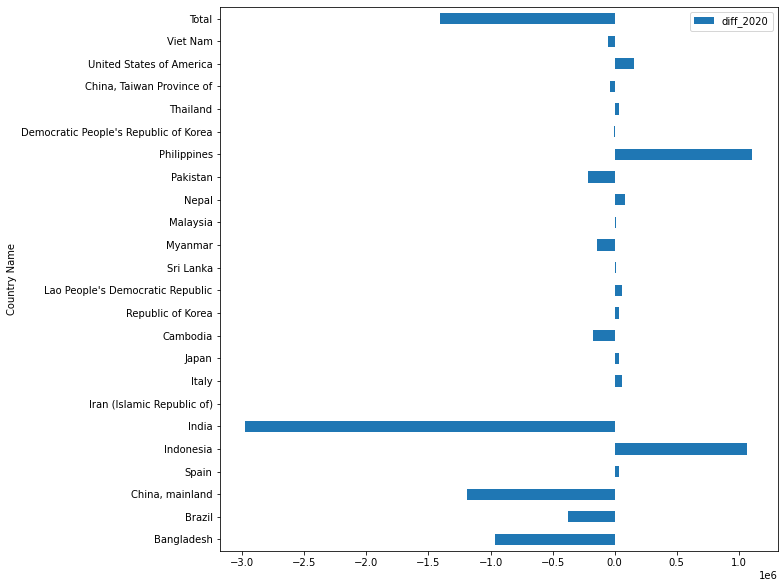

In [878]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference FAOSTAT - TRACE

<AxesSubplot:ylabel='Country Name'>

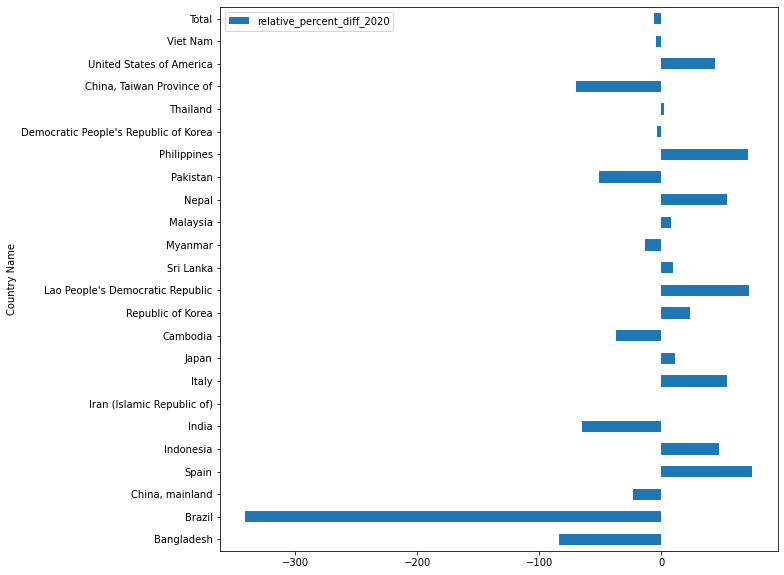

In [879]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["relative_percent_diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

## Recreating the Malysia Paper with 2018 Data.  

### University of Malaysia Data

In [ ]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

In [ ]:
# Selecting 2020 columns
malaysia_2020 = malaysia_emissions_df[["iso3_country","country_name", "tCH4_2020"]].copy()

In [ ]:
malaysia_2020

iso3_country                                 country_name     tCH4_2020
0           BGD                                   Bangladesh  2.106781e+06
1           BRA                                       Brazil  4.902874e+05
2           CHN                                        China  6.402353e+06
3           ESP                                        Spain  1.305461e+04
4           IDN                                    Indonesia  1.188195e+06
5           IND                                        India  7.599764e+06
6           IRN                   Iran (Islamic Republic of)  9.600254e+04
7           ITA                                        Italy  5.101547e+04
8           JPN                                        Japan  2.835167e+05
9           KHM                                     Cambodia  6.412802e+05
10          KOR                      Korea (the Republic of)  1.165467e+05
11          LAO       Lao People's Democratic Republic (the)  2.136270e+04
12          LKA                                    Sri Lanka  9.248238e+04
13          MMR                                      Myanmar  1.221904e+06
14          MYS                                     Malaysia  1.127141e+05
15          NPL                                        Nepal  7.168401e+04
16          PAK                                     Pakistan  6.401201e+05
17          PHL                            Philippines (the)  4.462836e+05
18          PRK  Korea (the Democratic People's Republic of)  8.581038e+04
19          THA                                     Thailand  1.520788e+06
20          TWN                   Taiwan (Province of China)  8.333327e+04
21          USA               United States of America (the)  1.941455e+05
22          VNM                                     Viet Nam  1.374450e+06
23          NaN                                        Total  2.485387e+07

## FAOSTAT Data 2018

In [ ]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

In [893]:
faostat_2018 = faostat_emissions_df[['code', 'country', 'country_fao', 2018]].copy()

In [894]:
faostat_2018

code                                      country  \
0   BGD                                   Bangladesh   
1   BRA                                       Brazil   
2   CHN                                        China   
3   ESP                                        Spain   
4   IDN                                    Indonesia   
5   IND                                        India   
6   IRN                   Iran (Islamic Republic of)   
7   ITA                                        Italy   
8   JPN                                        Japan   
9   KHM                                     Cambodia   
10  KOR                      Korea (the Republic of)   
11  LAO       Lao People's Democratic Republic (the)   
12  LKA                                    Sri Lanka   
13  MMR                                      Myanmar   
14  MYS                                     Malaysia   
15  NPL                                        Nepal   
16  PAK                                     Pakistan   
17  PHL                            Philippines (the)   
18  PRK  Korea (the Democratic People's Republic of)   
19  THA                                     Thailand   
20  TWN                   Taiwan (Province of China)   
21  USA               United States of America (the)   
22  VNM                                     Viet Nam   
23  NaN                                          NaN   

                              country_fao        2018  
0                              Bangladesh   1144591.0  
1                                  Brazil    121615.2  
2                         China, mainland   5302173.1  
3                                   Spain     52925.0  
4                               Indonesia   2405613.8  
5                                   India   4661154.9  
6              Iran (Islamic Republic of)     93936.6  
7                                   Italy    109463.8  
8                                   Japan    322245.0  
9                                Cambodia    479362.7  
10                      Republic of Korea    154911.3  
11       Lao People's Democratic Republic     83333.6  
12                              Sri Lanka    111049.0  
13                                Myanmar   1118850.0  
14                               Malaysia    125238.5  
15                                  Nepal    153890.8  
16                               Pakistan    393404.2  
17                            Philippines   1606047.8  
18  Democratic People's Republic of Korea     83943.3  
19                               Thailand   1702989.1  
20              China, Taiwan Province of     49414.1  
21               United States of America    412177.5  
22                               Viet Nam   1336231.2  
23                                  Total  24042561.5

In [895]:
faostat_2018.rename(columns={"code": "iso3_country"}, inplace =True)

## Merging Data on Iso3 Country Code

In [896]:
merged2020_df = faostat_2018.merge(malaysia_2020, on='iso3_country', how='left', sort=False)

In [897]:
merged2020_df

iso3_country                                      country  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2018  \
0                              Bangladesh   1144591.0   
1                                  Brazil    121615.2   
2                         China, mainland   5302173.1   
3                                   Spain     52925.0   
4                               Indonesia   2405613.8   
5                                   India   4661154.9   
6              Iran (Islamic Republic of)     93936.6   
7                                   Italy    109463.8   
8                                   Japan    322245.0   
9                                Cambodia    479362.7   
10                      Republic of Korea    154911.3   
11       Lao People's Democratic Republic     83333.6   
12                              Sri Lanka    111049.0   
13                                Myanmar   1118850.0   
14                               Malaysia    125238.5   
15                                  Nepal    153890.8   
16                               Pakistan    393404.2   
17                            Philippines   1606047.8   
18  Democratic People's Republic of Korea     83943.3   
19                               Thailand   1702989.1   
20              China, Taiwan Province of     49414.1   
21               United States of America    412177.5   
22                               Viet Nam   1336231.2   
23                                  Total  24042561.5   

                                   country_name     tCH4_2020  
0                                    Bangladesh  2.106781e+06  
1                                        Brazil  4.902874e+05  
2                                         China  6.402353e+06  
3                                         Spain  1.305461e+04  
4                                     Indonesia  1.188195e+06  
5                                         India  7.599764e+06  
6                    Iran (Islamic Republic of)  9.600254e+04  
7                                         Italy  5.101547e+04  
8                                         Japan  2.835167e+05  
9                                      Cambodia  6.412802e+05  
10                      Korea (the Republic of)  1.165467e+05  
11       Lao People's Democratic Republic (the)  2.136270e+04  
12                                    Sri Lanka  9.248238e+04  
13                                      Myanmar  1.221904e+06  
14              

### Calculate difference in Tonnes Between the Estimates

In [899]:
# Calculate Difference in tons
merged2020_df['diff_2020'] = merged2020_df[2018] - merged2020_df['tCH4_2020']




### Calculating the Percent Differences Between the Estimates

In [900]:
merged2020_df['abs_percent_diff_2020'] = (abs((merged2020_df[2018] - merged2020_df['tCH4_2020']))/(merged2020_df[2018] + merged2020_df["tCH4_2020"])/2)*100

merged2020_df['relative_percent_diff_2020'] = (merged2020_df[2018] - merged2020_df['tCH4_2020'])/(merged2020_df[2018])*100



In [901]:
merged2020_df

iso3_country                                      country  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2018  \
0                              Bangladesh   1144591.0   
1                                  Brazil    121615.2   
2                         China, mainland   5302173.1   
3                                   Spain     52925.0   
4                               Indonesia   2405613.8   
5                                   India   4661154.9   
6              Iran (Islamic Republic of)     93936.6   
7                                   Italy    109463.8   
8                                   Japan    322245.0   
9                                Cambodia    479362.7   
10                      Republic of Korea    154911.3   
11       Lao People's Democratic Republic     83333.6   
12                              Sri Lanka    111049.0   
13                                Myanmar   1118850.0   
14                               Malaysia    125238.5   
15                                  Nepal    153890.8   
16                               Pakistan    393404.2   
17                            Philippines   1606047.8   
18  Democratic People's Republic of Korea     83943.3   
19                               Thailand   1702989.1   
20              China, Taiwan Province of     49414.1   
21               United States of America    412177.5   
22                               Viet Nam   1336231.2   
23                                  Total  24042561.5   

                                   country_name     tCH4_2020     diff_2020  \
0                                    Bangladesh  2.106781e+06 -9.621904e+05   
1                                        Brazil  4.902874e+05 -3.686722e+05   
2                                         China  6.402353e+06 -1.100180e+06   
3                                         Spain  1.305461e+04  3.987039e+04   
4                                     Indonesia  1.188195e+06  1.217419e+06   
5                                         India  7.599764e+06 -2.938609e+06   
6                    Iran (Islamic Republic of)  9.600254e+04 -2.065943e+03   
7                                         Italy  5.101547e+04  5.844833e+04   
8                                         Japan  2.835167e+05  3.872833e+04   
9                                      Cambodia  6.412802e+05 -1.619175e+05   
10                      Korea (the Republic of)  1.165467e+05  3.836456e+04   
11       Lao People's Democr

### Tonnes CH4 FAOSTAT - TRACE Plot

<AxesSubplot:ylabel='Country Name'>

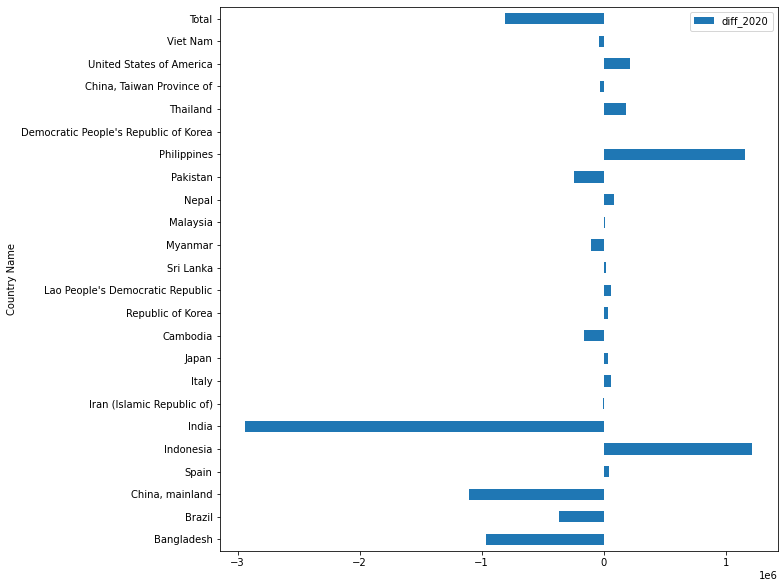

In [902]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference FAOSTAT - TRACE

<AxesSubplot:ylabel='Country Name'>

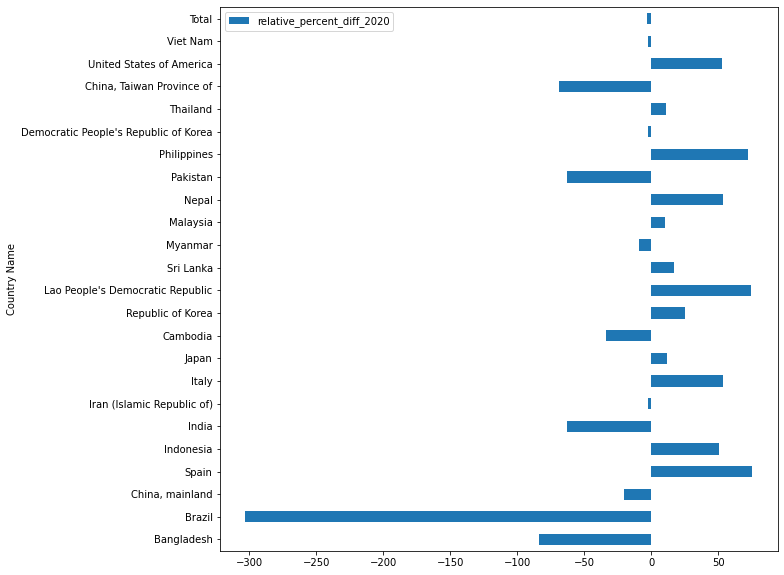

In [903]:
merged2020_df.plot(kind = "barh", x = 'country_fao', y = ["relative_percent_diff_2020"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

## Recreating the Malysia Paper same year

### University of Malaysia Data

In [906]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

malaysia_emissions_df = pd.read_excel(filepath)

In [907]:
# Selecting 2020 columns
malaysia_2018 = malaysia_emissions_df[["iso3_country","country_name", "tCH4_2018"]].copy()

In [908]:
malaysia_2018

iso3_country                                 country_name     tCH4_2018
0           BGD                                   Bangladesh  2.141231e+06
1           BRA                                       Brazil  3.717030e+05
2           CHN                                        China  5.413962e+06
3           ESP                                        Spain  1.405410e+04
4           IDN                                    Indonesia  1.176982e+06
5           IND                                        India  6.589798e+06
6           IRN                   Iran (Islamic Republic of)  8.875744e+04
7           ITA                                        Italy  4.469902e+04
8           JPN                                        Japan  1.548252e+05
9           KHM                                     Cambodia  5.592610e+05
10          KOR                      Korea (the Republic of)  1.293543e+05
11          LAO       Lao People's Democratic Republic (the)  1.009675e+04
12          LKA                                    Sri Lanka  9.018914e+04
13          MMR                                      Myanmar  1.372447e+06
14          MYS                                     Malaysia  1.066525e+05
15          NPL                                        Nepal  9.200752e+04
16          PAK                                     Pakistan  4.532297e+05
17          PHL                            Philippines (the)  4.175210e+05
18          PRK  Korea (the Democratic People's Republic of)  8.662578e+04
19          THA                                     Thailand  9.166575e+05
20          TWN                   Taiwan (Province of China)  8.138151e+04
21          USA               United States of America (the)  1.657254e+05
22          VNM                                     Viet Nam  1.317455e+06
23          NaN                                        Total  2.179462e+07

## FAOSTAT Data 2018

In [909]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/emissions_csv_fao_emiss_csv_ch4_fao_2015_2019_tonnes.xlsx"

faostat_emissions_df = pd.read_excel(filepath)

In [910]:
faostat_2018 = faostat_emissions_df[['code', 'country', 'country_fao', 2018]].copy()

In [911]:
faostat_2018

code                                      country  \
0   BGD                                   Bangladesh   
1   BRA                                       Brazil   
2   CHN                                        China   
3   ESP                                        Spain   
4   IDN                                    Indonesia   
5   IND                                        India   
6   IRN                   Iran (Islamic Republic of)   
7   ITA                                        Italy   
8   JPN                                        Japan   
9   KHM                                     Cambodia   
10  KOR                      Korea (the Republic of)   
11  LAO       Lao People's Democratic Republic (the)   
12  LKA                                    Sri Lanka   
13  MMR                                      Myanmar   
14  MYS                                     Malaysia   
15  NPL                                        Nepal   
16  PAK                                     Pakistan   
17  PHL                            Philippines (the)   
18  PRK  Korea (the Democratic People's Republic of)   
19  THA                                     Thailand   
20  TWN                   Taiwan (Province of China)   
21  USA               United States of America (the)   
22  VNM                                     Viet Nam   
23  NaN                                          NaN   

                              country_fao        2018  
0                              Bangladesh   1144591.0  
1                                  Brazil    121615.2  
2                         China, mainland   5302173.1  
3                                   Spain     52925.0  
4                               Indonesia   2405613.8  
5                                   India   4661154.9  
6              Iran (Islamic Republic of)     93936.6  
7                                   Italy    109463.8  
8                                   Japan    322245.0  
9                                Cambodia    479362.7  
10                      Republic of Korea    154911.3  
11       Lao People's Democratic Republic     83333.6  
12                              Sri Lanka    111049.0  
13                                Myanmar   1118850.0  
14                               Malaysia    125238.5  
15                                  Nepal    153890.8  
16                               Pakistan    393404.2  
17                            Philippines   1606047.8  
18  Democratic People's Republic of Korea     83943.3  
19                               Thailand   1702989.1  
20              China, Taiwan Province of     49414.1  
21               United States of America    412177.5  
22                               Viet Nam   1336231.2  
23                                  Total  24042561.5

In [912]:
faostat_2018.rename(columns={"code": "iso3_country"}, inplace =True)

## Merging Data on Iso3 Country Code

In [914]:
merged2018_df = faostat_2018.merge(malaysia_2018, on='iso3_country', how='left', sort=False)

In [916]:
merged2018_df

iso3_country                                      country  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2018  \
0                              Bangladesh   1144591.0   
1                                  Brazil    121615.2   
2                         China, mainland   5302173.1   
3                                   Spain     52925.0   
4                               Indonesia   2405613.8   
5                                   India   4661154.9   
6              Iran (Islamic Republic of)     93936.6   
7                                   Italy    109463.8   
8                                   Japan    322245.0   
9                                Cambodia    479362.7   
10                      Republic of Korea    154911.3   
11       Lao People's Democratic Republic     83333.6   
12                              Sri Lanka    111049.0   
13                                Myanmar   1118850.0   
14                               Malaysia    125238.5   
15                                  Nepal    153890.8   
16                               Pakistan    393404.2   
17                            Philippines   1606047.8   
18  Democratic People's Republic of Korea     83943.3   
19                               Thailand   1702989.1   
20              China, Taiwan Province of     49414.1   
21               United States of America    412177.5   
22                               Viet Nam   1336231.2   
23                                  Total  24042561.5   

                                   country_name     tCH4_2018  
0                                    Bangladesh  2.141231e+06  
1                                        Brazil  3.717030e+05  
2                                         China  5.413962e+06  
3                                         Spain  1.405410e+04  
4                                     Indonesia  1.176982e+06  
5                                         India  6.589798e+06  
6                    Iran (Islamic Republic of)  8.875744e+04  
7                                         Italy  4.469902e+04  
8                                         Japan  1.548252e+05  
9                                      Cambodia  5.592610e+05  
10                      Korea (the Republic of)  1.293543e+05  
11       Lao People's Democratic Republic (the)  1.009675e+04  
12                                    Sri Lanka  9.018914e+04  
13                                      Myanmar  1.372447e+06  
14              

### Calculate difference in Tonnes Between the Estimates

In [924]:
# Calculate Difference in tons
merged2018_df['diff_2018'] = merged2018_df[2018] - merged2018_df['tCH4_2018']




### Calculating the Percent Differences Between the Estimates

In [925]:
merged2018_df['abs_percent_diff_2018'] = (abs((merged2018_df[2018] - merged2018_df['tCH4_2018']))/(merged2018_df[2018] + merged2018_df["tCH4_2018"])/2)*100

merged2018_df['relative_percent_diff_2018'] = (merged2018_df[2018] - merged2018_df['tCH4_2018'])/(merged2018_df[2018])*100



In [926]:
merged2018_df

iso3_country                                      country  \
0           BGD                                   Bangladesh   
1           BRA                                       Brazil   
2           CHN                                        China   
3           ESP                                        Spain   
4           IDN                                    Indonesia   
5           IND                                        India   
6           IRN                   Iran (Islamic Republic of)   
7           ITA                                        Italy   
8           JPN                                        Japan   
9           KHM                                     Cambodia   
10          KOR                      Korea (the Republic of)   
11          LAO       Lao People's Democratic Republic (the)   
12          LKA                                    Sri Lanka   
13          MMR                                      Myanmar   
14          MYS                                     Malaysia   
15          NPL                                        Nepal   
16          PAK                                     Pakistan   
17          PHL                            Philippines (the)   
18          PRK  Korea (the Democratic People's Republic of)   
19          THA                                     Thailand   
20          TWN                   Taiwan (Province of China)   
21          USA               United States of America (the)   
22          VNM                                     Viet Nam   
23          NaN                                          NaN   

                              country_fao        2018  \
0                              Bangladesh   1144591.0   
1                                  Brazil    121615.2   
2                         China, mainland   5302173.1   
3                                   Spain     52925.0   
4                               Indonesia   2405613.8   
5                                   India   4661154.9   
6              Iran (Islamic Republic of)     93936.6   
7                                   Italy    109463.8   
8                                   Japan    322245.0   
9                                Cambodia    479362.7   
10                      Republic of Korea    154911.3   
11       Lao People's Democratic Republic     83333.6   
12                              Sri Lanka    111049.0   
13                                Myanmar   1118850.0   
14                               Malaysia    125238.5   
15                                  Nepal    153890.8   
16                               Pakistan    393404.2   
17                            Philippines   1606047.8   
18  Democratic People's Republic of Korea     83943.3   
19                               Thailand   1702989.1   
20              China, Taiwan Province of     49414.1   
21               United States of America    412177.5   
22                               Viet Nam   1336231.2   
23                                  Total  24042561.5   

                                   country_name     tCH4_2018  \
0                                    Bangladesh  2.141231e+06   
1                                        Brazil  3.717030e+05   
2                                         China  5.413962e+06   
3                                         Spain  1.405410e+04   
4                                     Indonesia  1.176982e+06   
5                                         India  6.589798e+06   
6                    Iran (Islamic Republic of)  8.875744e+04   
7                                         Italy  4.469902e+04   
8                                         Japan  1.548252e+05   
9                                      Cambodia  5.592610e+05   
10                      Korea (the Republic of)  1.293543e+05   
11       Lao People's Democratic Republic (the)  1.009675e+04   
12                                    Sri Lanka  9.018914e+04   
13                                      Myanmar  1.372447e+06   
1

### Tonnes CH4 FAOSTAT - TRACE Plot

<AxesSubplot:ylabel='Country Name'>

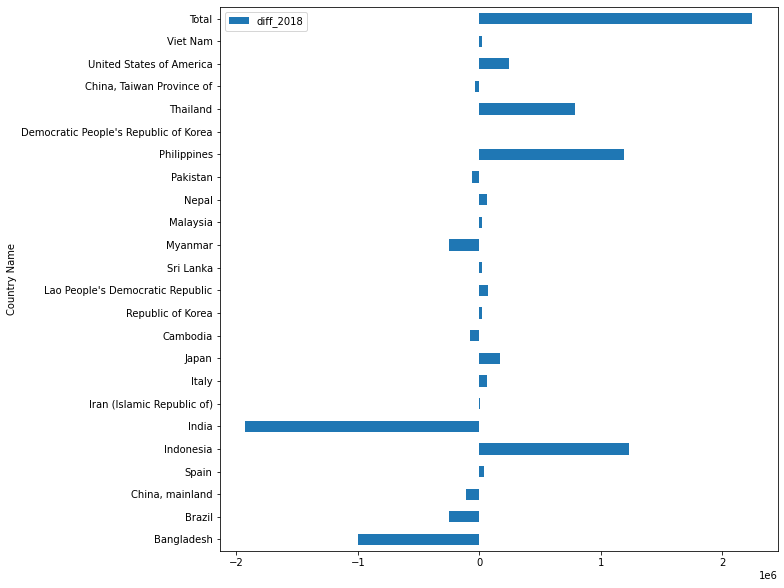

In [927]:
merged2018_df.plot(kind = "barh", x = 'country_fao', y = ["diff_2018"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize = (10,10))

### Percent Difference FAOSTAT - TRACE

<AxesSubplot:ylabel='Country Name'>

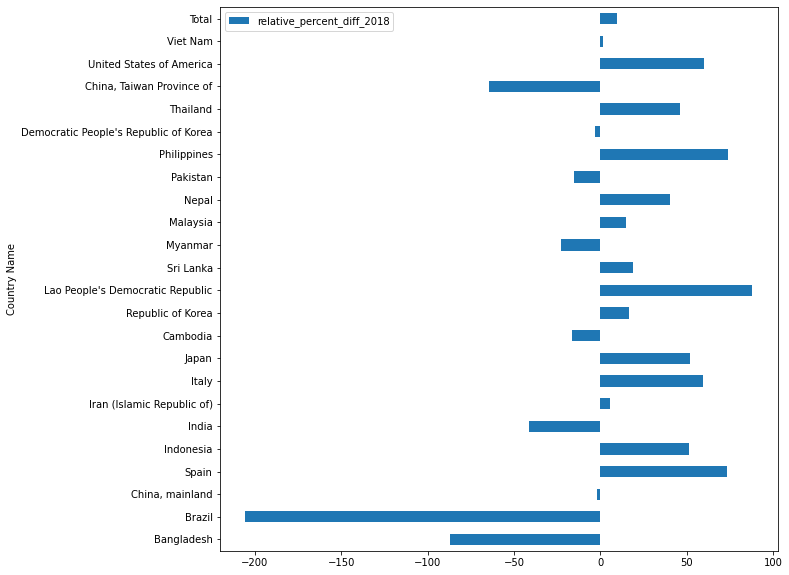

In [928]:
merged2018_df.plot(kind = "barh", x = 'country_fao', y = ["relative_percent_diff_2018"], xlabel = "Country Name", ylabel = "Tonnes CH4", figsize=(10,10))

### Impressions

I was not able to replicate the results exactly.  I reviewed the included paper to find that the university misleadingly rounded to three decimal places.  I did not manipulate the raw data.  

I found that the overall difference in reporting is only about 6 percent between 2019 and 2020.   The methodology is somewhat misleading as well, because when considering the previous 5 years of data demonstrated a consistent 3 percent difference.  When comparing the TRACE data to itself it does seem to show a significant increase between 2019 and 2020 emissions. I'll test this next  

## Hypothesis Testing the Malaysian Data

### Claims

* That the distributions do not differ between 2020 and 2019
* That the means do no differ between 2020 and 2019

## What will be testing.  

* That the Data are independent and evenly distributed: Test for normality
    * Shapiro-Wilk Test
* That the means between 2019 and 2020 do not differ: Parametric Statistical Hypothesis Tests
    * T Test because we have less than 25 observations
* If nonparametirc: That the distributions between 2019 and 2020 do not differ
    Mann-Whitney U Test



### Data Import
I am importing data again to ensure that our data is valid.  I will move this section to another notebook when the work is completed.  This file must be very large at this point.

In [880]:
filepath = "/Users/jnapolitano/Projects/wattime-takehome/data/ch4_2015-2021.xlsx"

hypothesis_testing_df = pd.read_excel(filepath)

### Drop total row from the data

In [881]:
hypothesis_testing_df = hypothesis_testing_df.loc[(hypothesis_testing_df['country_name'] != "Total")].copy() #copying to avoid modifying slices in memory.  Old df should also drop from memory in production environment.

In [882]:
hypothesis_testing_df

iso3_country                                 country_name     tCH4_2015  \
0           BGD                                   Bangladesh  2.344420e+06   
1           BRA                                       Brazil  3.410233e+05   
2           CHN                                        China  6.133647e+06   
3           ESP                                        Spain  1.141464e+04   
4           IDN                                    Indonesia  1.283649e+06   
5           IND                                        India  6.219887e+06   
6           IRN                   Iran (Islamic Republic of)  8.774407e+04   
7           ITA                                        Italy  4.995968e+04   
8           JPN                                        Japan  2.305465e+05   
9           KHM                                     Cambodia  4.954698e+05   
10          KOR                      Korea (the Republic of)  1.451878e+05   
11          LAO       Lao People's Democratic Republic (the)  1.661169e+04   
12          LKA                                    Sri Lanka  8.305626e+04   
13          MMR                                      Myanmar  1.132082e+06   
14          MYS                                     Malaysia  1.057399e+05   
15          NPL                                        Nepal  1.007479e+05   
16          PAK                                     Pakistan  4.852431e+05   
17          PHL                            Philippines (the)  3.432021e+05   
18          PRK  Korea (the Democratic People's Republic of)  1.143217e+05   
19          THA                                     Thailand  1.393798e+06   
20          TWN                   Taiwan (Province of China)  7.866956e+04   
21          USA               United States of America (the)  1.611324e+05   
22          VNM                                     Viet Nam  1.346013e+06   

       tCH4_2016     tCH4_2017     tCH4_2018     tCH4_2019     tCH4_2020  \
0   2.278158e+06  2.098958e+06  2.141231e+06  2.070985e+06  2.106781e+06   
1   3.104189e+05  3.725173e+05  3.717030e+05  3.294713e+05  4.902874e+05   
2   5.859531e+06  6.355071e+06  5.413962e+06  5.603352e+06  6.402353e+06   
3   1.334803e+04  1.217299e+04  1.405410e+04  1.148324e+04  1.305461e+04   
4   1.023129e+06  9.615327e+05  1.176982e+06  1.266668e+06  1.188195e+06   
5   5.309413e+06  6.228451e+06  6.589798e+06  7.501556e+06  7.599764e+06   
6   9.180121e+04  9.620217e+04  8.875744e+04  9.500199e+04  9.600254e+04   
7   4.937785e+04  5.443679e+04  4.469902e+04  4.566914e+04  5.101547e+04   
8   2.284133e+05  2.708935e+05  1.548252e+05  2.332056e+05  2.835167e+05   
9   5.731698e+05  4.517045e+05  5.592610e+05  5.947277e+05  6.412802e+05   
10  1.274597e+05  1.463222e+05  1.293543e+05  1.327782e+05  1.165467e+05   
11  1.696441e+04  1.168063e+04  1.009675e+04  1.461058e+04  2.136270e+04   
12  1.011743e+05  5.911841e+04  9.018914e+04  8.476088e+04  9.248238e+04   
13  1.290806e+06  1.205169e+06  1.372447e+06  1.256888e+06  1.221904e+06   
14  1.110049e+05  1.111291e+05  1.066525e+05  1.056287e+05  1.127141e+05   
15  6.667161e+04  8.081300e+04  9.200752e+04  1.164235e+05  7.168401e+04   
16  5.945922e+05  5.372641e+05  4.532297e+05  6.528548e+05  6.401201e+05   
17  4.073554e+05  3.836830e+05  4.175210e+05  3.584550e+05  4.462836e+05   
18  9.177653e+04  1.085457e+05  8.662578e+04  9.655062e+04  8.581038e+04   
19  1.780993e+06  1.164699e+06  9.166575e+05  1.305046e+06  1.520788e+06   
20  8.089149e+04  8.705634e+04  8.138151e+04  8.990870e+04  8.333327e+04   
21  1.618576e+05  1.684799e+05  1.657254e+05  1.691351e+05  1.941455e+05   
22  1.483777e+06  1.406437e+06  1.317455e+06  1.269751e+06  1.374450e+06   

       tCH4_2021  
0   1.983974e+06  
1   4.544874e+05  
2   6.068210e+06  
3   8.531579e+03  
4   1.009936e+06  
5   6.567960e+06  
6   9.053525e+04  
7   5.089759e+04  
8   1.574007e+05  
9   5.644891e+05  
10  1.013006e+05  
11  1.475014e+04  
12  8.466966e+04  
13  1.289837e+06  
14  1.069696e+05  
1

### Test for Normality: Shapiro-Wilk

#### 2019

In [883]:
## Selecting Malaysia 2019 Data 
data_2019 = hypothesis_testing_df['tCH4_2019']
data_2019

0     2.070985e+06
1     3.294713e+05
2     5.603352e+06
3     1.148324e+04
4     1.266668e+06
5     7.501556e+06
6     9.500199e+04
7     4.566914e+04
8     2.332056e+05
9     5.947277e+05
10    1.327782e+05
11    1.461058e+04
12    8.476088e+04
13    1.256888e+06
14    1.056287e+05
15    1.164235e+05
16    6.528548e+05
17    3.584550e+05
18    9.655062e+04
19    1.305046e+06
20    8.990870e+04
21    1.691351e+05
22    1.269751e+06
Name: tCH4_2019, dtype: float64

In [884]:
results = stats.shapiro(data_2019)
print('stat=%.3f, p=%.3f' % (results.statistic, results.pvalue))
if results.pvalue > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.567, p=0.000
Probably not Gaussian


##### Results

The distribution is not gausian so a non-paremtric test must be completed.  It is not necessary to perform this test on the 2020 data, but I will do so anyways for practice.

#### 2020

In [885]:
## Selecting the Malaysia Data 2020
data_2020 = hypothesis_testing_df['tCH4_2020']

In [886]:
results = stats.shapiro(data_2020)
print('stat=%.3f, p=%.3f' % (results.statistic, results.pvalue))
if results.pvalue > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.565, p=0.000
Probably not Gaussian


##### Results

The 2020 data is not gausian which verifies that we will need to perform a non parmetric test

### Independence of Samples.  
We have to assume that the samples are independent of each other as we know they are dependent on hecatares.  
Though the correlations are rather high this is due to the smiliarity of hectares per year.  Thus the amount of ch4 is similiar


### Distribution Similiarity

#### Mann-Whitney U Test

In [887]:
# Example of the Mann-Whitney U Test

stat, p = stats.mannwhitneyu(data_2019, data_2020)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=266.000, p=0.982
Probably the same distribution


### Kruskal Wallis test

In [888]:

stat, p = stats.kruskal(data_2019, data_2020)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.001, p=0.974
Probably the same distribution


### Friedman Test

Just for the sake of it I will compare data across all distributions

In [889]:
# Example of the Friedman Test
#data_2014 = hypothesis_testing_df['tCH4_2014']
data_2015 = hypothesis_testing_df['tCH4_2015']
data_2016 = hypothesis_testing_df['tCH4_2016']
data_2017 = hypothesis_testing_df['tCH4_2017']
data_2018 = hypothesis_testing_df['tCH4_2018']

stat, p = stats.friedmanchisquare(data_2015, data_2016, data_2017, data_2018, data_2019, data_2020)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=11.472, p=0.043
Probably different distributions


#### Results.  

Some distributions differ from one another.  Which those are have yet to be discovered.  For the sake of this analysis I will not attempt to identify them.  

The statment that the distributions of the 2019 and 2020 data do not differ cannot differ.  That said we also cannot claim that the means are statistically equivalent as the data is not parametric.  

